# An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.
# You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.
# Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.

In [1]:
import klib 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
init_notebook_mode(connected=True)

In [2]:
dic = pd.read_excel("Customer Churn Data.xlsx", sheet_name='Meta Data')

In [3]:
dic

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Variable,Description
1,NaN,AccountID,account unique identifier
2,NaN,Churn,account churn flag (Target)
3,NaN,Tenure,Tenure of account
4,NaN,City_Tier,Tier of primary customer's city
5,NaN,CC_Contacted_L12m,How many times all the customers of the accoun...
6,NaN,Payment,Preferred Payment mode of the customers in the...
7,NaN,Gender,Gender of the primary customer of the account
8,NaN,Service_Score,Satisfaction score given by customers of the a...
9,NaN,Account_user_count,Number of customers tagged with this account


In [4]:
pd.options.display.float_format = '{:.2f}'.format   


In [5]:
df = pd.read_excel("Customer Churn Data.xlsx", sheet_name='Data for DSBA')

In [6]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.00,6.00,Debit Card,Female,3.00,3,Super,2.00,Single,9,1.00,11,1,5,159.93,Mobile
1,20001,1,0,1.00,8.00,UPI,Male,3.00,4,Regular Plus,3.00,Single,7,1.00,15,0,0,120.90,Mobile
2,20002,1,0,1.00,30.00,Debit Card,Male,2.00,4,Regular Plus,3.00,Single,6,1.00,14,0,3,NaN,Mobile
3,20003,1,0,3.00,15.00,Debit Card,Male,2.00,4,Super,5.00,Single,8,0.00,23,0,3,134.07,Mobile
4,20004,1,0,1.00,12.00,Credit Card,Male,2.00,3,Regular Plus,5.00,Single,3,0.00,11,1,3,129.60,Mobile


In [7]:
print('Number of Variable in the dataset:',df.shape[1])
print('Number of Observation in the dataset:',df.shape[0])

Number of Variable in the dataset: 19
Number of Observation in the dataset: 11260


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [9]:
 df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

C:\Users\Pc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



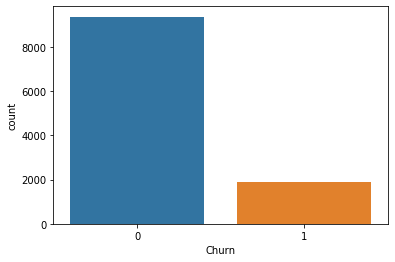

In [10]:
sns.countplot(df.Churn)

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.00,NaN,NaN,NaN,25629.50,3250.63,20000.00,22814.75,25629.50,28444.25,31259.00
Churn,11260.00,NaN,NaN,NaN,0.17,0.37,0.00,0.00,0.00,0.00,1.00
Tenure,11158.00,38.00,1.00,1351.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.00,NaN,NaN,NaN,1.65,0.92,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,11158.00,NaN,NaN,NaN,17.87,8.85,4.00,11.00,16.00,23.00,132.00
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.00,NaN,NaN,NaN,2.90,0.73,0.00,2.00,3.00,3.00,5.00
Account_user_count,11148.00,7.00,4.00,4569.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
col=(df.columns)
col

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

In [14]:
df['Payment']=df['Payment'].str.replace(' ','_')
df['Gender']=df['Gender'].replace('F','Female')
df['Gender']=df['Gender'].replace('M','Male')
df.Gender.value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [15]:
df['Tenure']=df['Tenure'].replace('#',np.nan)

df['Account_user_count']=df['Account_user_count'].replace('@',np.nan)
df['rev_per_month']=df['rev_per_month'].replace('+',np.nan)
df['rev_growth_yoy']=df['rev_growth_yoy'].replace('$',np.nan)
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('*',np.nan).replace('#',np.nan).replace('$',np.nan)
df['account_segment']=df['account_segment'].replace('Super +','Super Plus').replace('Regular +','Regular Plus')
df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].replace('#',np.nan).replace('$',np.nan)
df['Login_device']=df['Login_device'].replace('&&&&',np.nan).replace('$',np.nan)
df['cashback']=df['cashback'].replace('$',np.nan)

In [16]:
df['City_Tier'].value_counts()

1.00    7263
3.00    3405
2.00     480
Name: City_Tier, dtype: int64

In [17]:
cleanup_nums_1 = {"City_Tier":  {1: 'One', 2: 'Two', 3: 'Three'}}


In [18]:
df = df.replace(cleanup_nums_1)
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.00,Three,6.00,Debit_Card,Female,3.00,3.00,Super,2.00,Single,9.00,1.00,11.00,1.00,5.00,159.93,Mobile
1,20001,1,0.00,One,8.00,UPI,Male,3.00,4.00,Regular Plus,3.00,Single,7.00,1.00,15.00,0.00,0.00,120.90,Mobile
2,20002,1,0.00,One,30.00,Debit_Card,Male,2.00,4.00,Regular Plus,3.00,Single,6.00,1.00,14.00,0.00,3.00,NaN,Mobile
3,20003,1,0.00,Three,15.00,Debit_Card,Male,2.00,4.00,Super,5.00,Single,8.00,0.00,23.00,0.00,3.00,134.07,Mobile
4,20004,1,0.00,One,12.00,Credit_Card,Male,2.00,3.00,Regular Plus,5.00,Single,3.00,0.00,11.00,1.00,3.00,129.60,Mobile


In [19]:
df['Service_Score'].value_counts()

3.00    5490
2.00    3251
4.00    2331
1.00      77
0.00       8
5.00       5
Name: Service_Score, dtype: int64

In [20]:
cleanup_nums_2 = {"Service_Score":  {0: 'Zero' ,1: 'One', 2: 'Two', 3: 'Three',4: 'Four',5:'Five'}}


In [21]:
df = df.replace(cleanup_nums_2)
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.00,Three,6.00,Debit_Card,Female,Three,3.00,Super,2.00,Single,9.00,1.00,11.00,1.00,5.00,159.93,Mobile
1,20001,1,0.00,One,8.00,UPI,Male,Three,4.00,Regular Plus,3.00,Single,7.00,1.00,15.00,0.00,0.00,120.90,Mobile
2,20002,1,0.00,One,30.00,Debit_Card,Male,Two,4.00,Regular Plus,3.00,Single,6.00,1.00,14.00,0.00,3.00,NaN,Mobile
3,20003,1,0.00,Three,15.00,Debit_Card,Male,Two,4.00,Super,5.00,Single,8.00,0.00,23.00,0.00,3.00,134.07,Mobile
4,20004,1,0.00,One,12.00,Credit_Card,Male,Two,3.00,Regular Plus,5.00,Single,3.00,0.00,11.00,1.00,3.00,129.60,Mobile


In [22]:
df['Account_user_count'].value_counts()

4.00    4569
3.00    3261
5.00    1699
2.00     526
1.00     446
6.00     315
Name: Account_user_count, dtype: int64

In [23]:
cleanup_nums_3 = {"Account_user_count":  {1: 'One', 2: 'Two', 3: 'Three',4: 'Four',5:'Five',6:'Six'}}


In [24]:
df = df.replace(cleanup_nums_3)
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.00,Three,6.00,Debit_Card,Female,Three,Three,Super,2.00,Single,9.00,1.00,11.00,1.00,5.00,159.93,Mobile
1,20001,1,0.00,One,8.00,UPI,Male,Three,Four,Regular Plus,3.00,Single,7.00,1.00,15.00,0.00,0.00,120.90,Mobile
2,20002,1,0.00,One,30.00,Debit_Card,Male,Two,Four,Regular Plus,3.00,Single,6.00,1.00,14.00,0.00,3.00,NaN,Mobile
3,20003,1,0.00,Three,15.00,Debit_Card,Male,Two,Four,Super,5.00,Single,8.00,0.00,23.00,0.00,3.00,134.07,Mobile
4,20004,1,0.00,One,12.00,Credit_Card,Male,Two,Three,Regular Plus,5.00,Single,3.00,0.00,11.00,1.00,3.00,129.60,Mobile


In [25]:
df['CC_Agent_Score'].value_counts()

3.00    3360
1.00    2302
5.00    2191
4.00    2127
2.00    1164
Name: CC_Agent_Score, dtype: int64

In [26]:
cleanup_nums_4 = {"CC_Agent_Score":  {1: 'One', 2: 'Two', 3: 'Three',4: 'Four',5:'Five'}}


In [27]:
df = df.replace(cleanup_nums_4)
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.00,Three,6.00,Debit_Card,Female,Three,Three,Super,Two,Single,9.00,1.00,11.00,1.00,5.00,159.93,Mobile
1,20001,1,0.00,One,8.00,UPI,Male,Three,Four,Regular Plus,Three,Single,7.00,1.00,15.00,0.00,0.00,120.90,Mobile
2,20002,1,0.00,One,30.00,Debit_Card,Male,Two,Four,Regular Plus,Three,Single,6.00,1.00,14.00,0.00,3.00,NaN,Mobile
3,20003,1,0.00,Three,15.00,Debit_Card,Male,Two,Four,Super,Five,Single,8.00,0.00,23.00,0.00,3.00,134.07,Mobile
4,20004,1,0.00,One,12.00,Credit_Card,Male,Two,Three,Regular Plus,Five,Single,3.00,0.00,11.00,1.00,3.00,129.60,Mobile


In [28]:
df['Complain_ly'].value_counts()

0.00    7792
1.00    3111
Name: Complain_ly, dtype: int64

In [29]:
cleanup_nums_5 = {"Complain_ly":  {1.00: 'One', 0.00: 'Zero'}}


In [30]:
df = df.replace(cleanup_nums_5)
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.00,Three,6.00,Debit_Card,Female,Three,Three,Super,Two,Single,9.00,One,11.00,1.00,5.00,159.93,Mobile
1,20001,1,0.00,One,8.00,UPI,Male,Three,Four,Regular Plus,Three,Single,7.00,One,15.00,0.00,0.00,120.90,Mobile
2,20002,1,0.00,One,30.00,Debit_Card,Male,Two,Four,Regular Plus,Three,Single,6.00,One,14.00,0.00,3.00,NaN,Mobile
3,20003,1,0.00,Three,15.00,Debit_Card,Male,Two,Four,Super,Five,Single,8.00,Zero,23.00,0.00,3.00,134.07,Mobile
4,20004,1,0.00,One,12.00,Credit_Card,Male,Two,Three,Regular Plus,Five,Single,3.00,Zero,11.00,1.00,3.00,129.60,Mobile


In [31]:
df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [32]:
cleanup_nums_6 = {"Churn":  {1.00: 'One', 0.00: 'Zero'}}


In [33]:
df = df.replace(cleanup_nums_6)
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,One,4.00,Three,6.00,Debit_Card,Female,Three,Three,Super,Two,Single,9.00,One,11.00,1.00,5.00,159.93,Mobile
1,20001,One,0.00,One,8.00,UPI,Male,Three,Four,Regular Plus,Three,Single,7.00,One,15.00,0.00,0.00,120.90,Mobile
2,20002,One,0.00,One,30.00,Debit_Card,Male,Two,Four,Regular Plus,Three,Single,6.00,One,14.00,0.00,3.00,NaN,Mobile
3,20003,One,0.00,Three,15.00,Debit_Card,Male,Two,Four,Super,Five,Single,8.00,Zero,23.00,0.00,3.00,134.07,Mobile
4,20004,One,0.00,One,12.00,Credit_Card,Male,Two,Three,Regular Plus,Five,Single,3.00,Zero,11.00,1.00,3.00,129.60,Mobile


In [34]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CHURN :  2
One     1896
Zero    9364
Name: Churn, dtype: int64


CITY_TIER :  3
Two       480
Three    3405
One      7263
Name: City_Tier, dtype: int64


PAYMENT :  5
UPI                  822
Cash_on_Delivery    1014
E_wallet            1217
Credit_Card         3511
Debit_Card          4587
Name: Payment, dtype: int64


GENDER :  2
Female    4448
Male      6704
Name: Gender, dtype: int64


SERVICE_SCORE :  6
Five        5
Zero        8
One        77
Four     2331
Two      3251
Three    5490
Name: Service_Score, dtype: int64


ACCOUNT_USER_COUNT :  6
Six       315
One       446
Two       526
Five     1699
Three    3261
Four     4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4124
Name: account_segment, dtype: int64


CC_AGENT_SCORE :  5
Two      1164
Four     2127
Five     2191
One      2302
Three    3360
Name: CC_Agent_Score, dtype: int64


MARITAL_STATUS :  3
Divorced

In [35]:
pd.set_option('display.max_rows', None)

In [36]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,One,4.00,Three,6.00,Debit_Card,Female,Three,Three,Super,Two,Single,9.00,One,11.00,1.00,5.00,159.93,Mobile
1,20001,One,0.00,One,8.00,UPI,Male,Three,Four,Regular Plus,Three,Single,7.00,One,15.00,0.00,0.00,120.90,Mobile
2,20002,One,0.00,One,30.00,Debit_Card,Male,Two,Four,Regular Plus,Three,Single,6.00,One,14.00,0.00,3.00,NaN,Mobile
3,20003,One,0.00,Three,15.00,Debit_Card,Male,Two,Four,Super,Five,Single,8.00,Zero,23.00,0.00,3.00,134.07,Mobile
4,20004,One,0.00,One,12.00,Credit_Card,Male,Two,Three,Regular Plus,Five,Single,3.00,Zero,11.00,1.00,3.00,129.60,Mobile


In [37]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  object 
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  object 
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  object 
 8   Account_user_count       10816 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  object 
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  object 
 14  rev_growth_yoy        

## Missing Values

In [38]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [39]:
df.isnull().sum().sum()

4361

In [40]:
df.isnull().sum().sort_values(ascending = False)/df.index.size

rev_per_month             0.07
Login_device              0.07
cashback                  0.04
Account_user_count        0.04
Day_Since_CC_connect      0.03
Complain_ly               0.03
Tenure                    0.02
Marital_Status            0.02
CC_Agent_Score            0.01
City_Tier                 0.01
Payment                   0.01
Gender                    0.01
CC_Contacted_LY           0.01
Service_Score             0.01
account_segment           0.01
coupon_used_for_payment   0.00
rev_growth_yoy            0.00
Churn                     0.00
AccountID                 0.00
dtype: float64

In [41]:
df.duplicated().sum()

0

In [42]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [43]:
cols=df.isnull().sum()[df.isnull().sum()>0].index
cols

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [44]:
objects=df[cols].select_dtypes(include=['object','category']).columns
non_objects=df[cols].select_dtypes(exclude=['object','category']).columns

In [45]:
objects

Index(['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly',
       'Login_device'],
      dtype='object')

In [46]:
non_objects

Index(['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback'],
      dtype='object')

In [47]:
def remove_outlires(col):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [48]:
((df> UL) | (df < LL)).sum()

C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



AccountID                     0
Account_user_count            0
CC_Agent_Score                0
CC_Contacted_LY              42
Churn                         0
City_Tier                     0
Complain_ly                   0
Day_Since_CC_connect         33
Gender                        0
Login_device                  0
Marital_Status                0
Payment                       0
Service_Score                 0
Tenure                      139
account_segment               0
cashback                    879
coupon_used_for_payment    1380
rev_growth_yoy                0
rev_per_month               185
dtype: int64

In [49]:
((df> UL) | (df < LL)).sum().sum()

C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



2658

In [50]:
df[((df > UL) | (df < LL))]= np.nan

C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [51]:
df.isnull().sum()

AccountID                     0
Churn                         0
Tenure                      357
City_Tier                   112
CC_Contacted_LY             144
Payment                     109
Gender                      108
Service_Score                98
Account_user_count          444
account_segment              97
CC_Agent_Score              116
Marital_Status              212
rev_per_month               976
Complain_ly                 357
rev_growth_yoy                3
coupon_used_for_payment    1383
Day_Since_CC_connect        391
cashback                   1352
Login_device                760
dtype: int64

In [52]:
df.isnull().sum().sum()

7019

In [53]:
df.isnull().sum().sort_values(ascending = False)/df.index.size

coupon_used_for_payment   0.12
cashback                  0.12
rev_per_month             0.09
Login_device              0.07
Account_user_count        0.04
Day_Since_CC_connect      0.03
Tenure                    0.03
Complain_ly               0.03
Marital_Status            0.02
CC_Contacted_LY           0.01
CC_Agent_Score            0.01
City_Tier                 0.01
Payment                   0.01
Gender                    0.01
Service_Score             0.01
account_segment           0.01
rev_growth_yoy            0.00
Churn                     0.00
AccountID                 0.00
dtype: float64

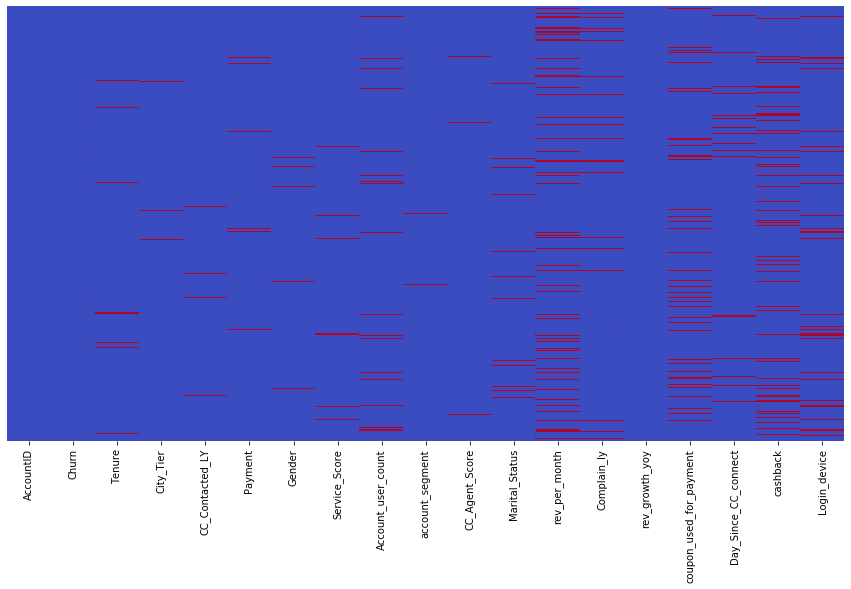

In [54]:
plt.figure(figsize = (15,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [55]:
## Missing value and Outlier treatment

In [56]:
from sklearn.impute import KNNImputer

In [57]:
imputer = KNNImputer(n_neighbors=10)

In [58]:
df[non_objects] = pd.DataFrame(imputer.fit_transform(df[non_objects]), columns = non_objects)

In [59]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month                0
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               760
dtype: int64

In [60]:
df.isnull().sum().sum()

2413

In [61]:
df=df.fillna(df.mode().iloc[0])

In [62]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [63]:
df.shape

(11260, 19)

In [64]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,One,4.00,Three,6.00,Debit_Card,Female,Three,Three,Super,Two,Single,9.00,One,11.00,1.00,5.00,159.93,Mobile
1,20001,One,0.00,One,8.00,UPI,Male,Three,Four,Regular Plus,Three,Single,7.00,One,15.00,0.00,0.00,120.90,Mobile
2,20002,One,0.00,One,30.00,Debit_Card,Male,Two,Four,Regular Plus,Three,Single,6.00,One,14.00,0.00,3.00,142.88,Mobile
3,20003,One,0.00,Three,15.00,Debit_Card,Male,Two,Four,Super,Five,Single,8.00,Zero,23.00,0.00,3.00,134.07,Mobile
4,20004,One,0.00,One,12.00,Credit_Card,Male,Two,Three,Regular Plus,Five,Single,3.00,Zero,11.00,1.00,3.00,129.60,Mobile


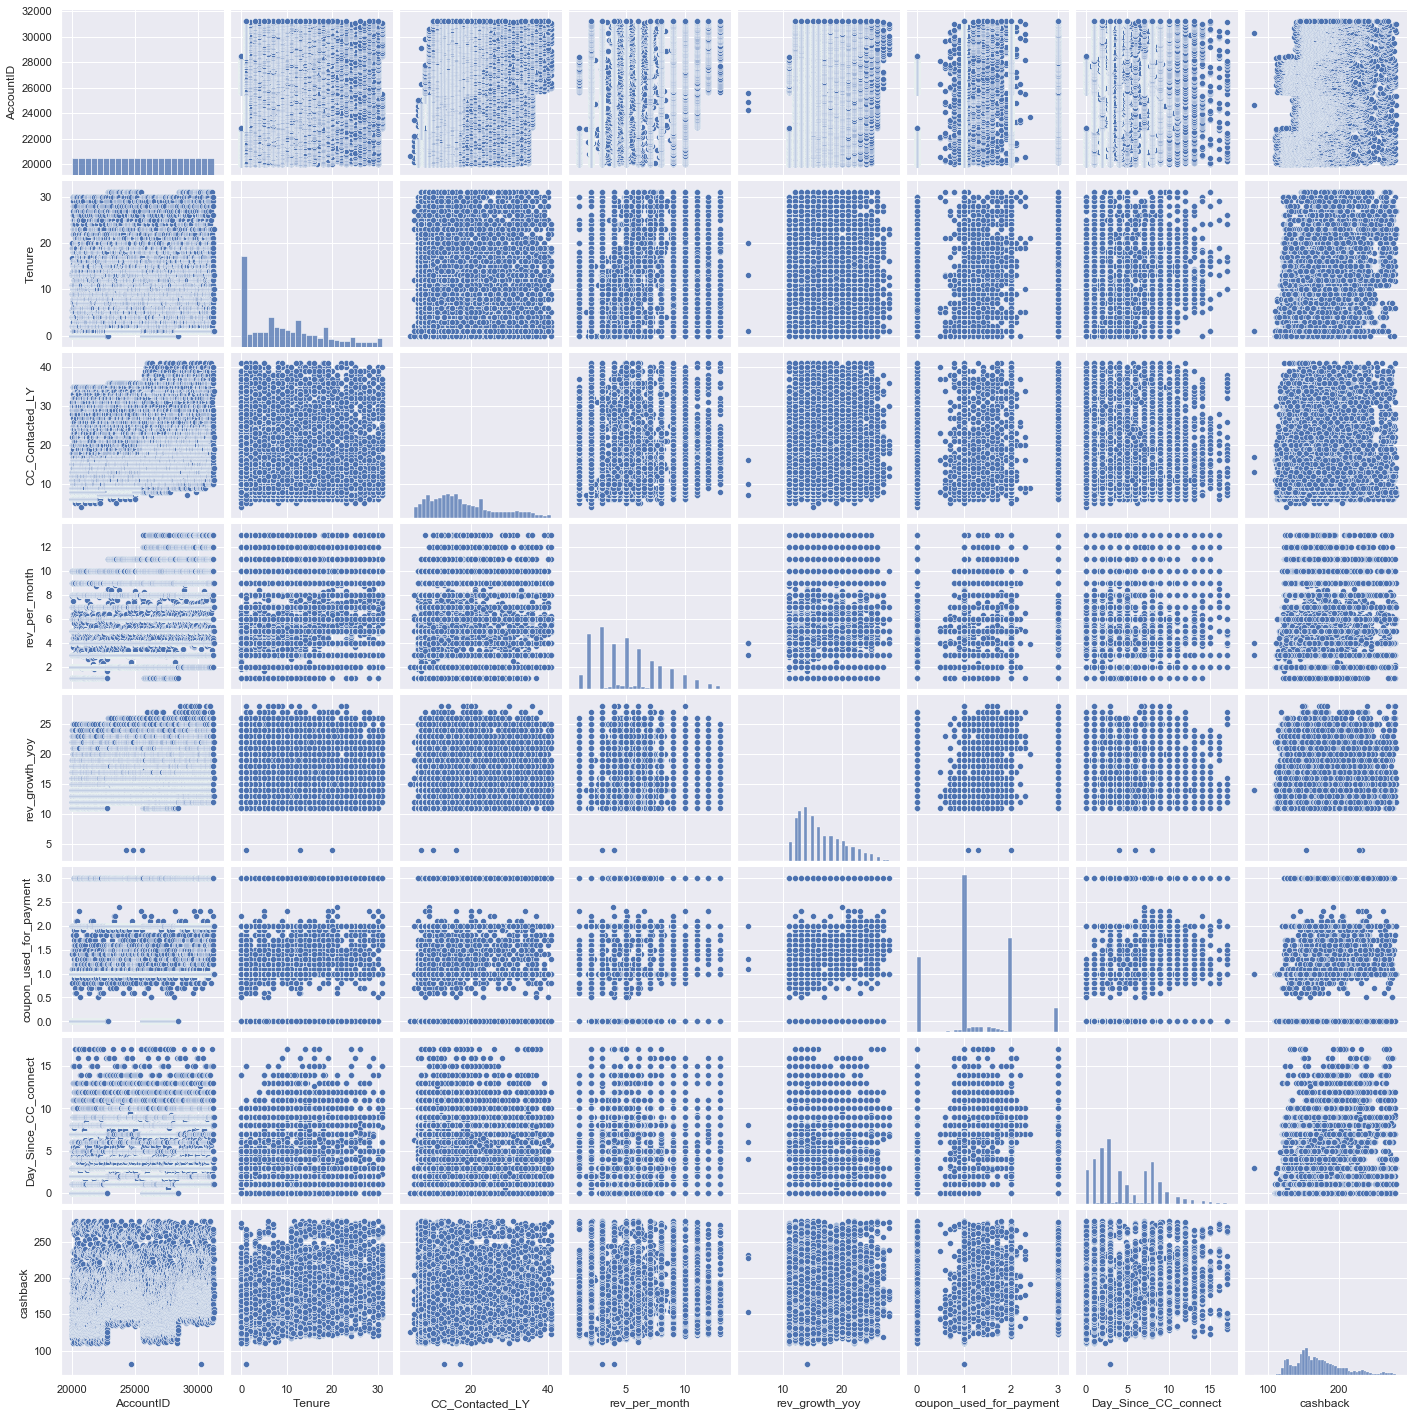

In [65]:
sns.set(rc={'figure.figsize':(11.7,6)})
sns.pairplot(df)

In [66]:
non_objects

Index(['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback'],
      dtype='object')

In [67]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CHURN :  2
One     1896
Zero    9364
Name: Churn, dtype: int64


CITY_TIER :  3
Two       480
Three    3405
One      7375
Name: City_Tier, dtype: int64


PAYMENT :  5
UPI                  822
Cash_on_Delivery    1014
E_wallet            1217
Credit_Card         3511
Debit_Card          4696
Name: Payment, dtype: int64


GENDER :  2
Female    4448
Male      6812
Name: Gender, dtype: int64


SERVICE_SCORE :  6
Five        5
Zero        8
One        77
Four     2331
Two      3251
Three    5588
Name: Service_Score, dtype: int64


ACCOUNT_USER_COUNT :  6
Six       315
One       446
Two       526
Five     1699
Three    3261
Four     5013
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4221
Name: account_segment, dtype: int64


CC_AGENT_SCORE :  5
Two      1164
Four     2127
Five     2191
One      2302
Three    3476
Name: CC_Agent_Score, dtype: int64


MARITAL_STATUS :  3
Divorced

In [68]:
klib.corr_mat(df)

,AccountID,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
AccountID,1.00,0.03,0.25,0.34,0.17,0.22,0.06,0.16
Tenure,0.03,1.00,-0.02,0.24,0.02,0.08,0.20,0.41
CC_Contacted_LY,0.25,-0.02,1.00,0.07,0.07,0.02,0.01,0.07
rev_per_month,0.34,0.24,0.07,1.00,0.05,0.11,-0.06,0.19
rev_growth_yoy,0.17,0.02,0.07,0.05,1.00,0.09,0.00,0.04
coupon_used_for_payment,0.22,0.08,0.02,0.11,0.09,1.00,0.18,0.23
Day_Since_CC_connect,0.06,0.20,0.01,-0.06,0.00,0.18,1.00,0.36
cashback,0.16,0.41,0.07,0.19,0.04,0.23,0.36,1.00


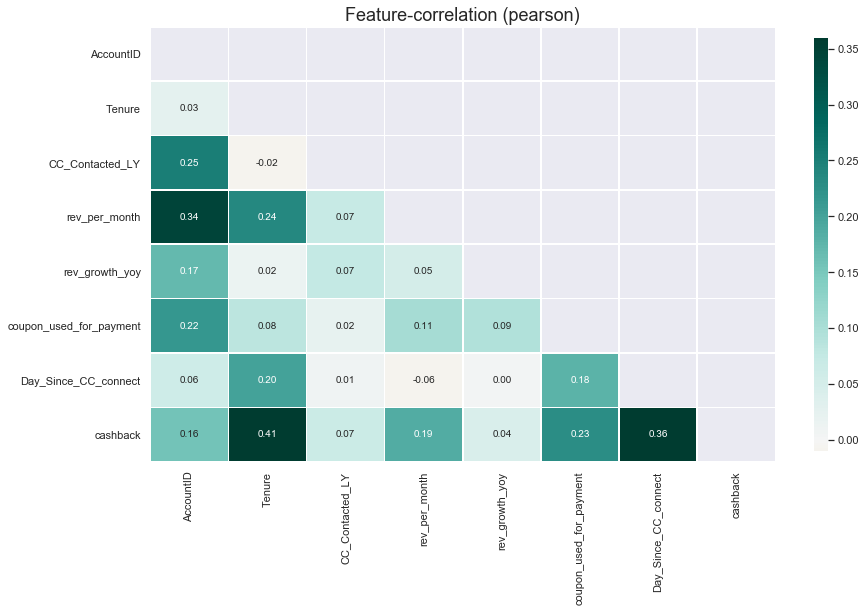

In [69]:
klib.corr_plot(df,figsize=(14,8))

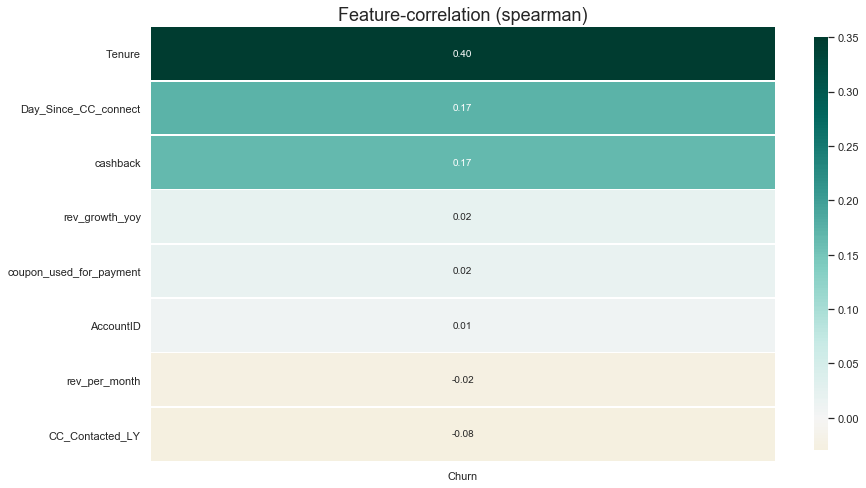

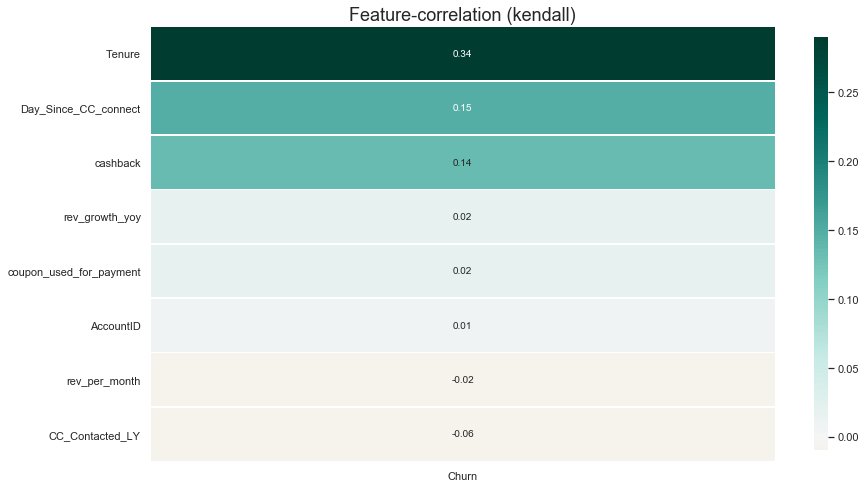

In [70]:
klib.corr_plot(df, target='Churn', method="spearman", figsize=(14,8))
klib.corr_plot(df, target='Churn', method="kendall",figsize=(14,8))

## Converting Variable with string in to categorical values

In [71]:
for feature in df.columns:
    if df[feature].dtype=='object':
        print('\n')
        print('feature',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature]=pd.Categorical(df[feature]).codes



feature Churn
['One', 'Zero']
Categories (2, object): ['One', 'Zero']
[0 1]


feature City_Tier
['Three', 'One', 'Two']
Categories (3, object): ['One', 'Three', 'Two']
[1 0 2]


feature Payment
['Debit_Card', 'UPI', 'Credit_Card', 'Cash_on_Delivery', 'E_wallet']
Categories (5, object): ['Cash_on_Delivery', 'Credit_Card', 'Debit_Card', 'E_wallet', 'UPI']
[2 4 1 0 3]


feature Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature Service_Score
['Three', 'Two', 'One', 'Zero', 'Four', 'Five']
Categories (6, object): ['Five', 'Four', 'One', 'Three', 'Two', 'Zero']
[3 4 2 5 1 0]


feature Account_user_count
['Three', 'Four', 'Five', 'Two', 'One', 'Six']
Categories (6, object): ['Five', 'Four', 'One', 'Six', 'Three', 'Two']
[4 1 0 5 2 3]


feature account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus']
Categories (5, object): ['HNI', 'Regular', 'Regular Plus', 'Super', 'Super Plus']
[3 2 1 0 4]


feature CC_Agent_Score
['Two', 'Three', 'Five'

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


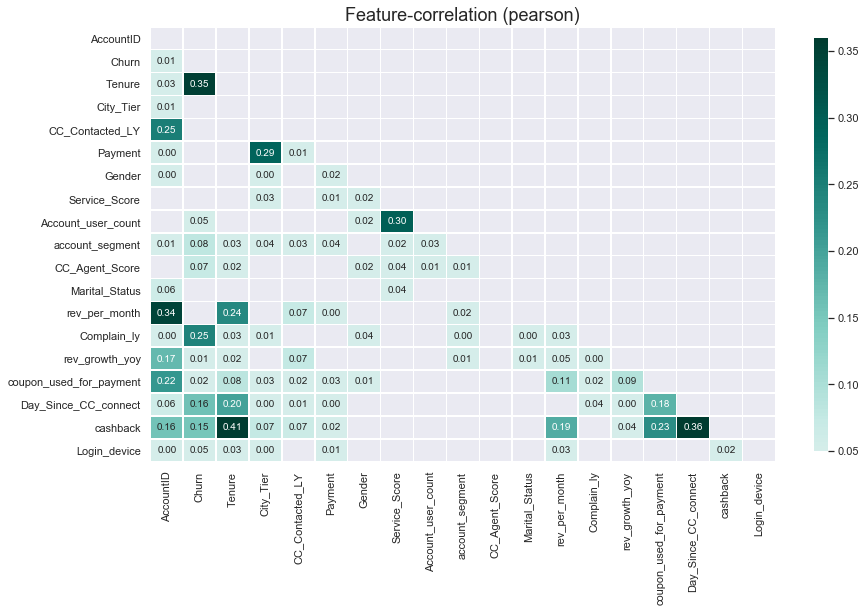

In [72]:
klib.corr_plot(df,split='pos',figsize=(14,8))

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


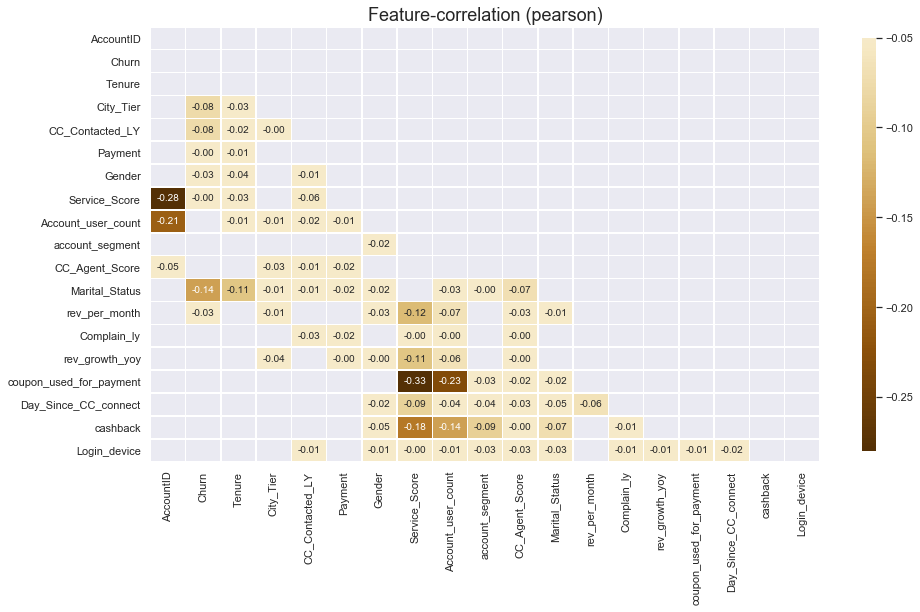

In [73]:
klib.corr_plot(df,split='neg',figsize=(15,8))

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


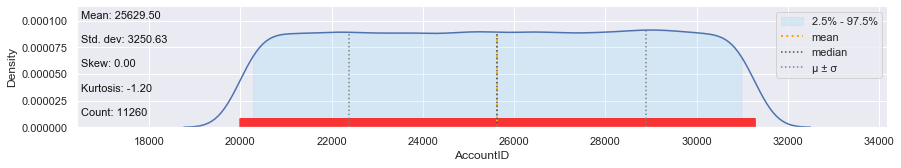

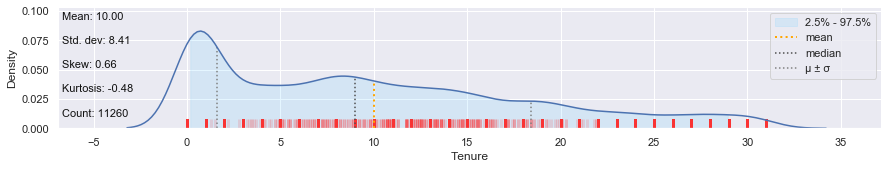

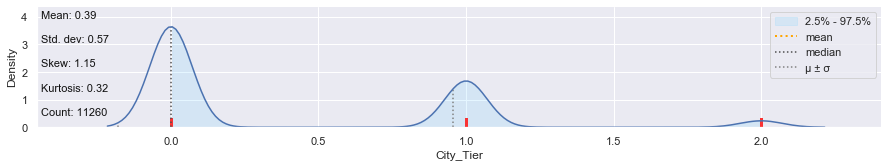

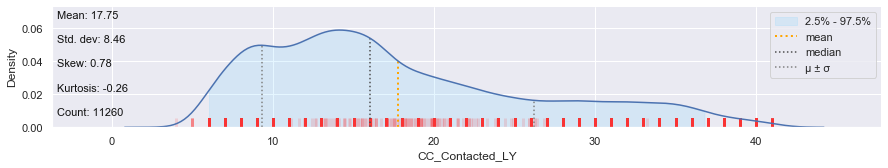

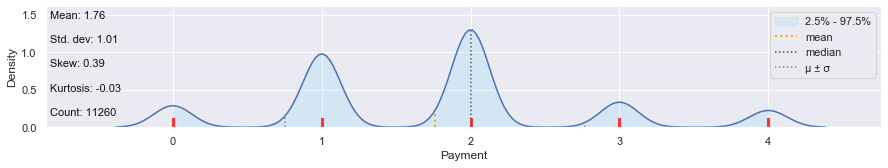

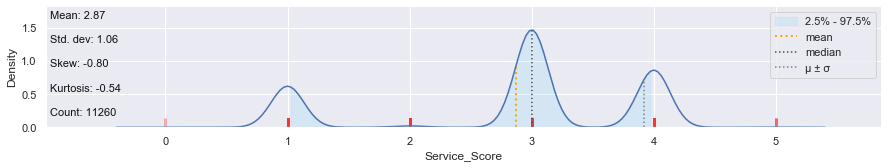

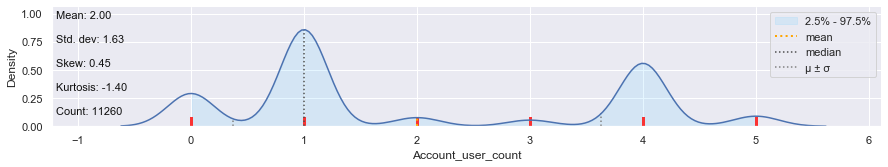

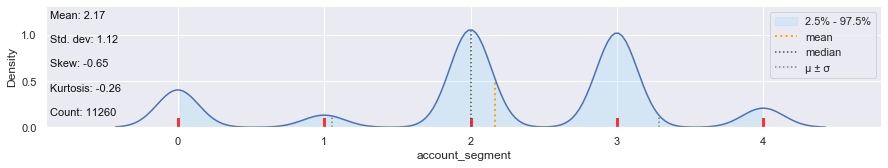

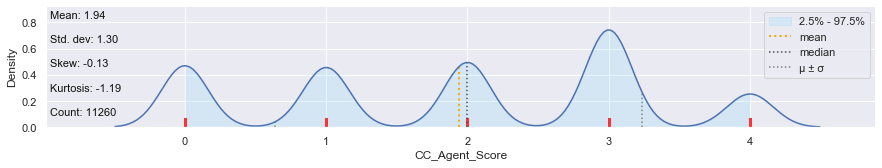

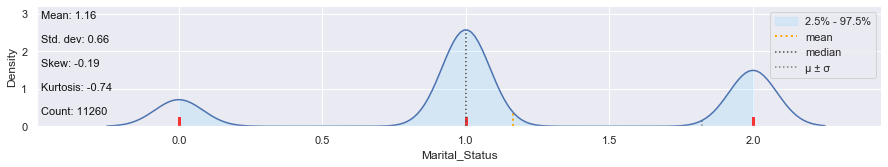

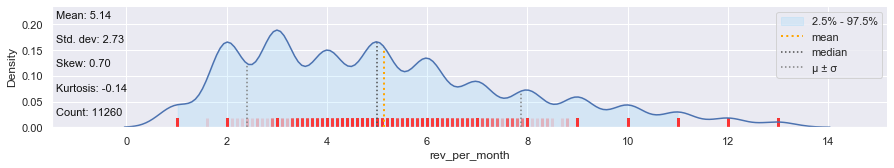

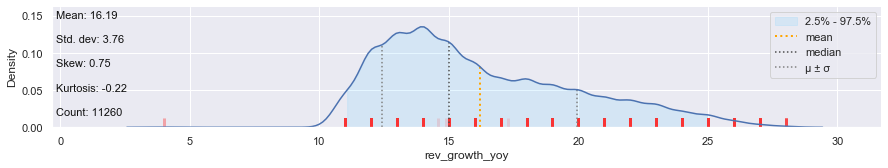

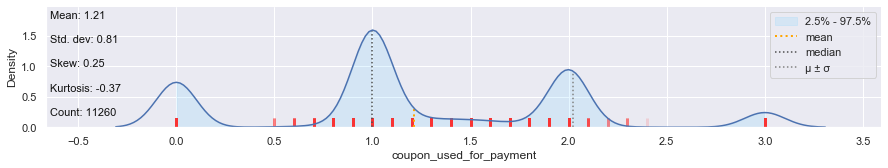

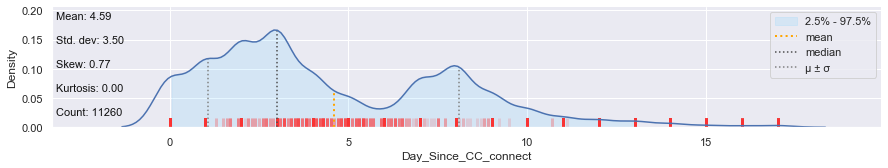

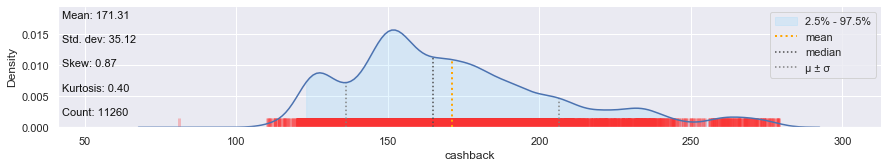

In [74]:
klib.dist_plot(df)

## Model Building

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix,plot_confusion_matrix


In [76]:
## Spliting the Data

In [77]:
x = df.drop('Churn',axis=1)
y = df.Churn

sc = StandardScaler()
x = sc.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [78]:
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('Y-train',y_train.shape)
print('Y_test',y_test.shape)

X_train (7882, 18)
X_test (3378, 18)
Y-train (7882,)
Y_test (3378,)


In [79]:
## Basic Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR_Train=LR.predict(x_train)
y_pred_LR_Test = LR.predict(x_test)

In [82]:
confusion_matrix(y_train,y_pred_LR_Train)

array([[ 601,  740],
       [ 224, 6317]], dtype=int64)

In [83]:
print(classification_report(y_train,y_pred_LR_Train))


              precision    recall  f1-score   support

           0       0.73      0.45      0.55      1341
           1       0.90      0.97      0.93      6541

    accuracy                           0.88      7882
   macro avg       0.81      0.71      0.74      7882
weighted avg       0.87      0.88      0.87      7882



In [84]:
confusion_matrix(y_test,y_pred_LR_Test)

array([[ 271,  284],
       [  80, 2743]], dtype=int64)

In [85]:
print(classification_report(y_test,y_pred_LR_Test))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60       555
           1       0.91      0.97      0.94      2823

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



In [86]:
log_metrics=classification_report(y_train, y_pred_LR_Train,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1"][0],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_f1=round(df.loc["1"][2],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.9
log_train_recall  0.97
log_train_f1  0.93


In [87]:
log_metrics=classification_report(y_test, y_pred_LR_Test,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1"][0],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_f1=round(df.loc["1"][2],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.91
log_test_recall  0.97
log_test_f1  0.94


In [88]:
log_train_acc = LR.score(x_train, y_train)
log_train_acc

0.8776960162395331

In [89]:
log_test_acc = LR.score(x_train, y_train)
log_test_acc

0.8776960162395331

In [90]:
## AUC and ROC Curve for Logistic Regression For Train Data

AUC: 0.868


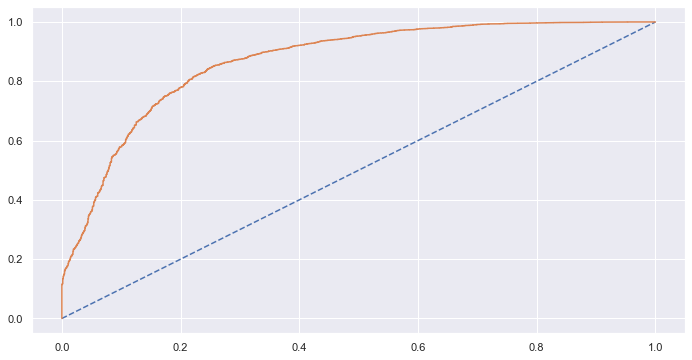

In [91]:
# predict probabilities
probs = LR.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr);

In [92]:
## AUC and ROC curve for Logistic Regression for Test Data

AUC: 0.873


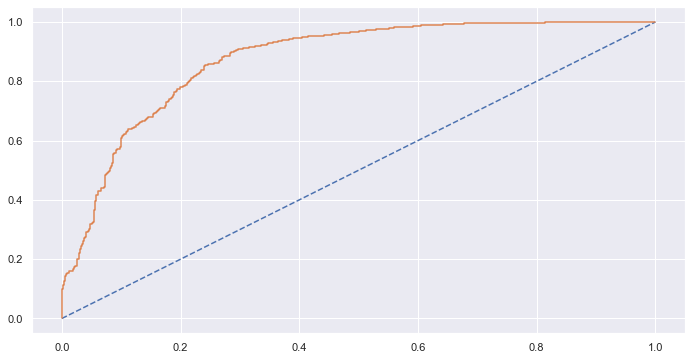

In [93]:
# predict probabilities
probs = LR.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr);

## KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier
params = {
    
    'n_neighbors': range(1,10),
    'weights': ['uniform','distance'],
    'p': [1,2,3]
}

knn = KNeighborsClassifier()

gs = GridSearchCV(estimator=knn,n_jobs=-1,cv=5,param_grid=params,scoring='recall')
gs.fit(x,y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [95]:
gs.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [96]:
## Creating a kNN model based on the above best parameters

In [97]:
knn = KNeighborsClassifier(**gs.best_params_)
knn.fit(x_train,y_train)
y_pred_knn_Train = knn.predict(x_train)
y_pred_knn_Test = knn.predict(x_test)

In [98]:
confusion_matrix(y_train,y_pred_knn_Train)

array([[1341,    0],
       [   0, 6541]], dtype=int64)

In [99]:
print(classification_report(y_train,y_pred_knn_Train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      6541

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [100]:
confusion_matrix(y_test,y_pred_knn_Test)

array([[ 420,  135],
       [  28, 2795]], dtype=int64)

In [101]:
print(classification_report(y_test,y_pred_knn_Test))

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       555
           1       0.95      0.99      0.97      2823

    accuracy                           0.95      3378
   macro avg       0.95      0.87      0.90      3378
weighted avg       0.95      0.95      0.95      3378



In [102]:
knn_metrics=classification_report(y_train, y_pred_knn_Train,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_precision=round(df.loc["1"][0],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_f1=round(df.loc["1"][2],2)
print ('KNN_train_precision ',knn_train_precision)
print ('KNN_train_recall ',knn_train_recall)
print ('KNN_train_f1 ',knn_train_f1)

KNN_train_precision  1.0
KNN_train_recall  1.0
KNN_train_f1  1.0


In [103]:
knn_metrics=classification_report(y_test, y_pred_knn_Test,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
print ('KNN_test_precision ',knn_test_precision)
print ('KNN_test_recall ',knn_test_recall)
print ('KNN_test_f1 ',knn_test_f1)

KNN_test_precision  0.95
KNN_test_recall  0.99
KNN_test_f1  0.97


In [104]:
knn_train_acc = knn.score(x_train, y_train)
knn_train_acc

1.0

In [105]:
knn_test_acc = knn.score(x_train, y_train)
knn_test_acc

1.0

In [106]:
## AUC and ROC Curve for KNN For Train Data

AUC: 1.000


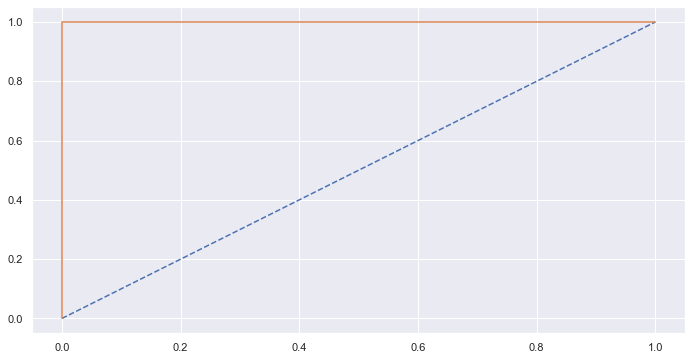

In [107]:
# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);

In [108]:
## AUC and ROC curve for KNN for Test Data

AUC: 0.990


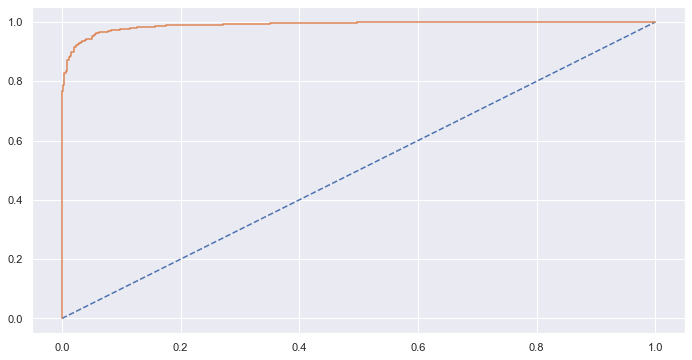

In [109]:
# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr);

## Naive Bayes 

In [110]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb_Train = nb.predict(x_train)
y_pred_nb_Test = nb.predict(x_test)

In [111]:
confusion_matrix(y_train,y_pred_nb_Train)

array([[ 768,  573],
       [ 546, 5995]], dtype=int64)

In [112]:
print(classification_report(y_train,y_pred_nb_Train))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1341
           1       0.91      0.92      0.91      6541

    accuracy                           0.86      7882
   macro avg       0.75      0.74      0.75      7882
weighted avg       0.86      0.86      0.86      7882



In [113]:
confusion_matrix(y_test,y_pred_nb_Test)

array([[ 316,  239],
       [ 208, 2615]], dtype=int64)

In [114]:
print(classification_report(y_test,y_pred_nb_Test))

              precision    recall  f1-score   support

           0       0.60      0.57      0.59       555
           1       0.92      0.93      0.92      2823

    accuracy                           0.87      3378
   macro avg       0.76      0.75      0.75      3378
weighted avg       0.86      0.87      0.87      3378



In [115]:
nb_metrics=classification_report(y_train, y_pred_nb_Train,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_precision=round(df.loc["1"][0],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_f1=round(df.loc["1"][2],2)
print ('Naive_Bayes_train_precision ',nb_train_precision)
print ('Naive_Bayes_train_recall ',nb_train_recall)
print ('Naive_Bayes_train_f1 ',nb_train_f1)

Naive_Bayes_train_precision  0.91
Naive_Bayes_train_recall  0.92
Naive_Bayes_train_f1  0.91


In [116]:
nb_metrics=classification_report(y_test, y_pred_nb_Test,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_precision=round(df.loc["1"][0],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_f1=round(df.loc["1"][2],2)
print ('Naive_Bayes_test_precision ',nb_test_precision)
print ('Naive_Bayes_test_recall ',nb_test_recall)
print ('Naive_Bayes_test_f1 ',nb_test_f1)

Naive_Bayes_test_precision  0.92
Naive_Bayes_test_recall  0.93
Naive_Bayes_test_f1  0.92


In [117]:
nb_train_acc = nb.score(x_train, y_train)
nb_train_acc

0.8580309566099975

In [118]:
nb_test_acc = nb.score(x_train, y_train)
nb_test_acc

0.8580309566099975

In [119]:
## AUC and ROC Curve for Naive_Bayes For Train Data

AUC: 0.826


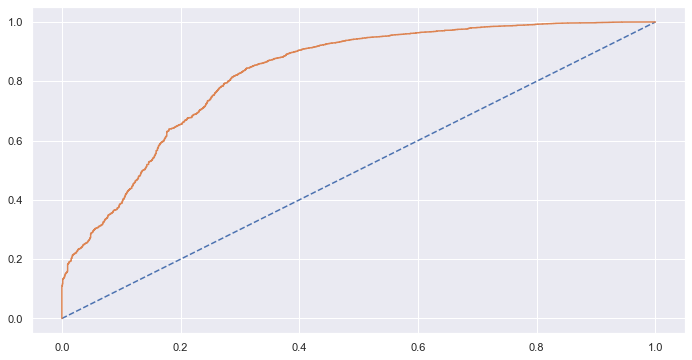

In [120]:
# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr);

In [121]:
## AUC and ROC curve for Naive_Bayes for Test Data

AUC: 0.823


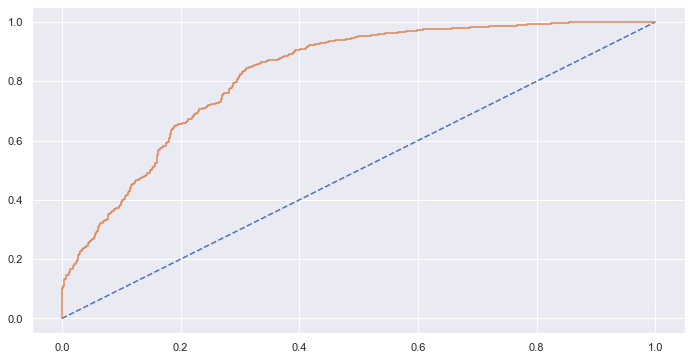

In [122]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr);

## Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

params = {
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

dt = DecisionTreeClassifier()

gs = GridSearchCV(estimator=dt,n_jobs=-1,cv=3,param_grid=params,scoring='recall')
gs.fit(x,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'log2'],
                         'max_leaf_nodes': range(2, 10),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [124]:

gs.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'max_leaf_nodes': 2,
 'splitter': 'best'}

In [125]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(x_train,y_train)
y_pred_dt_Train = dt.predict(x_train)
y_pred_dt_Test = dt.predict(x_test)

In [126]:
confusion_matrix(y_train,y_pred_dt_Train)

array([[   0, 1341],
       [   0, 6541]], dtype=int64)

In [127]:
print(classification_report(y_train,y_pred_dt_Train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1341
           1       0.83      1.00      0.91      6541

    accuracy                           0.83      7882
   macro avg       0.41      0.50      0.45      7882
weighted avg       0.69      0.83      0.75      7882



C:\Users\Pc\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [128]:
confusion_matrix(y_test,y_pred_dt_Test)

array([[   0,  555],
       [   0, 2823]], dtype=int64)

In [129]:
print(classification_report(y_test,y_pred_dt_Test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       555
           1       0.84      1.00      0.91      2823

    accuracy                           0.84      3378
   macro avg       0.42      0.50      0.46      3378
weighted avg       0.70      0.84      0.76      3378



In [130]:
dt_metrics=classification_report(y_train, y_pred_dt_Train,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
dt_train_precision=round(df.loc["1"][0],2)
dt_train_recall=round(df.loc["1"][1],2)
dt_train_f1=round(df.loc["1"][2],2)
print ('Decision_Tree_train_precision ',dt_train_precision)
print ('Decision_Tree_train_recall ',dt_train_recall)
print ('Decision_Tree_train_f1 ',dt_train_f1)

Decision_Tree_train_precision  0.83
Decision_Tree_train_recall  1.0
Decision_Tree_train_f1  0.91


In [131]:
dt_metrics=classification_report(y_test, y_pred_dt_Test,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
dt_test_precision=round(df.loc["1"][0],2)
dt_test_recall=round(df.loc["1"][1],2)
dt_test_f1=round(df.loc["1"][2],2)
print ('Decision_Tree_test_precision ',dt_test_precision)
print ('Decision_Tree_test_recall ',dt_test_recall)
print ('Decision_Tree_test_f1 ',dt_test_f1)

Decision_Tree_test_precision  0.84
Decision_Tree_test_recall  1.0
Decision_Tree_test_f1  0.91


In [132]:
dt_train_acc = dt.score(x_train, y_train)
dt_train_acc

0.8298655163664045

In [133]:
dt_test_acc = dt.score(x_test, y_test)
dt_test_acc

0.8357015985790408

In [134]:
## AUC and ROC Curve for Decision_Tree For Train Data

AUC: 0.612


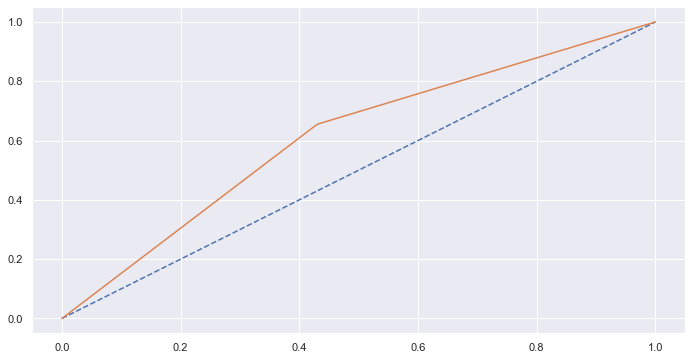

In [135]:
# predict probabilities
probs = dt.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_train_auc)
# calculate roc curve
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_train_fpr, dt_train_tpr);

In [136]:
## AUC and ROC curve for Decision_Tree for Test Data

AUC: 0.606


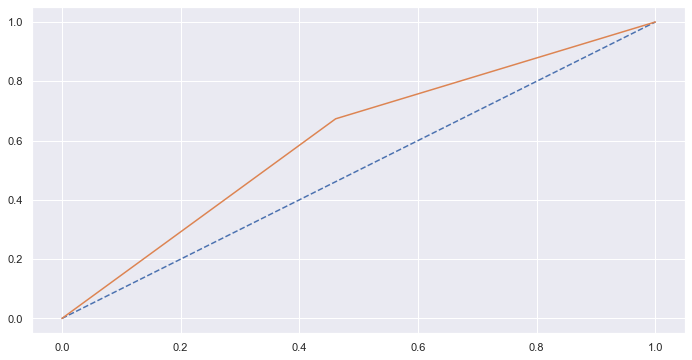

In [137]:
# predict probabilities
probs = dt.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_test_auc)
# calculate roc curve
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_test_fpr, dt_test_tpr);

## Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf = RandomForestClassifier(n_estimators = 501)
rf.fit(x_train,y_train)
y_pred_rf_Train = rf.predict(x_train)
y_pred_rf_Test = rf.predict(x_test)

In [145]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(n_estimators=501)>

In [140]:
confusion_matrix(y_train,y_pred_rf_Train)

array([[1341,    0],
       [   0, 6541]], dtype=int64)

In [141]:
print(classification_report(y_train,y_pred_rf_Train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      6541

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [142]:
confusion_matrix(y_test,y_pred_rf_Test)

array([[ 455,  100],
       [  21, 2802]], dtype=int64)

In [143]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

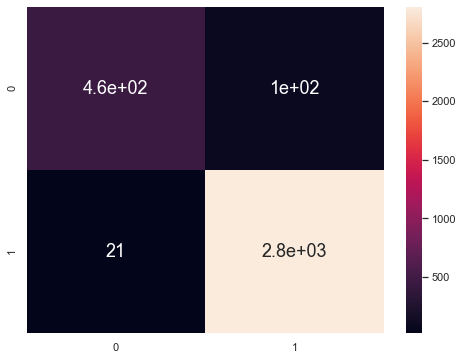

In [144]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred_rf_Test), annot=True,annot_kws={"size": 18})

In [145]:
print(classification_report(y_test,y_pred_rf_Test))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       555
           1       0.97      0.99      0.98      2823

    accuracy                           0.96      3378
   macro avg       0.96      0.91      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [146]:
rf_metrics=classification_report(y_train, y_pred_rf_Train,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('Random_Forest_train_precision ',rf_train_precision)
print ('Random_Forest_train_recall ',rf_train_recall)
print ('Random_Forest_train_f1 ',rf_train_f1)

Random_Forest_train_precision  1.0
Random_Forest_train_recall  1.0
Random_Forest_train_f1  1.0


In [147]:
rf_metrics=classification_report(y_test, y_pred_rf_Test,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('Random_Forest_test_precision ',rf_test_precision)
print ('Random_Forest_test_recall ',rf_test_recall)
print ('Random_Forest_test_f1 ',rf_test_f1)

Random_Forest_test_precision  0.97
Random_Forest_test_recall  0.99
Random_Forest_test_f1  0.98


In [148]:
rf_train_acc = rf.score(x_train, y_train)
rf_train_acc

1.0

In [149]:
rf_test_acc = rf.score(x_train, y_train)
rf_test_acc

1.0

In [150]:
## AUC and ROC Curve for Random Forest For Train Data

AUC: 1.000


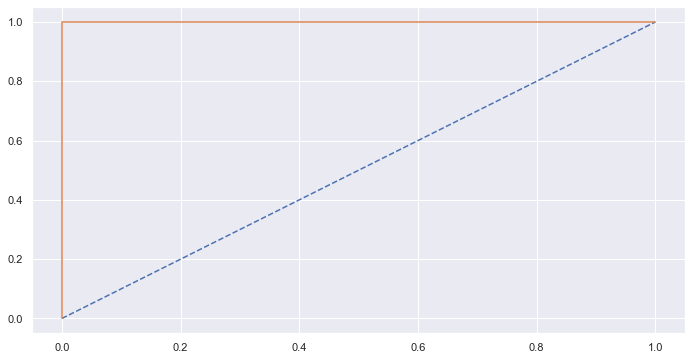

In [151]:
# predict probabilities
probs = rf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr);

In [152]:
## AUC and ROC curve for Random Forest for Test Data

AUC: 0.988


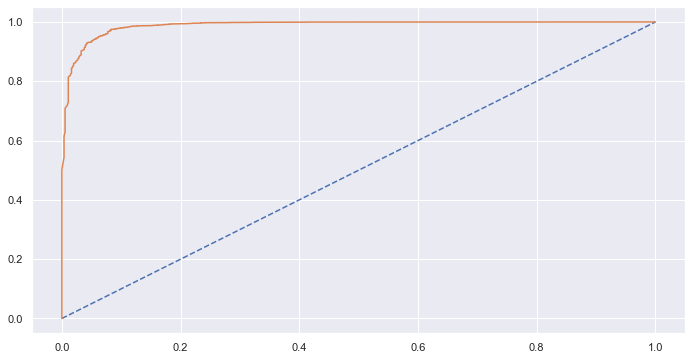

In [153]:
# predict probabilities
probs = rf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr);

## Linear Discrimination Analysis

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [155]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train,y_train)
y_pred_LDA_Train=LDA.predict(x_train)
y_pred_LDA_Test = LDA.predict(x_test)

In [156]:
confusion_matrix(y_train,y_pred_LDA_Train)

array([[ 522,  819],
       [ 189, 6352]], dtype=int64)

In [157]:
print(classification_report(y_train,y_pred_LDA_Train))


              precision    recall  f1-score   support

           0       0.73      0.39      0.51      1341
           1       0.89      0.97      0.93      6541

    accuracy                           0.87      7882
   macro avg       0.81      0.68      0.72      7882
weighted avg       0.86      0.87      0.86      7882



In [158]:
confusion_matrix(y_test,y_pred_LDA_Test)

array([[ 243,  312],
       [  67, 2756]], dtype=int64)

In [159]:
print(classification_report(y_test,y_pred_LDA_Test))

              precision    recall  f1-score   support

           0       0.78      0.44      0.56       555
           1       0.90      0.98      0.94      2823

    accuracy                           0.89      3378
   macro avg       0.84      0.71      0.75      3378
weighted avg       0.88      0.89      0.87      3378



In [160]:
lda_metrics=classification_report(y_train, y_pred_LDA_Train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.89
lda_train_recall  0.97
lda_train_f1  0.93


In [161]:
lda_metrics=classification_report(y_test, y_pred_LDA_Test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.9
lda_test_recall  0.98
lda_test_f1  0.94


In [162]:
lda_train_acc = LDA.score(x_train, y_train)
lda_train_acc

0.872113676731794

In [163]:
lda_test_acc = LDA.score(x_train, y_train)
lda_test_acc

0.872113676731794

In [164]:
## AUC and ROC Curve for Linear Discriminatory Analysis For Train Data

AUC: 0.859


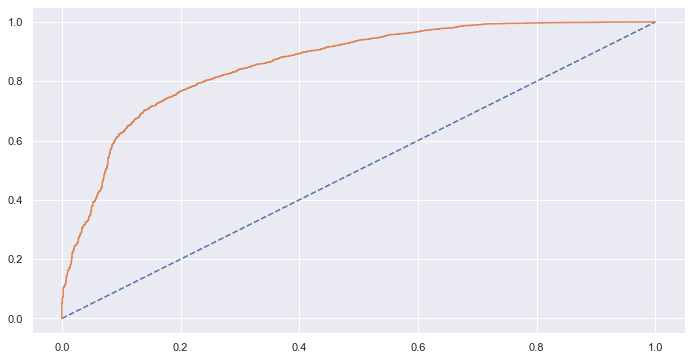

In [165]:
# predict probabilities
probs = LDA.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);

In [166]:
## AUC and ROC curve for Linear Discriminatory Analysis for Test Data

AUC: 0.865


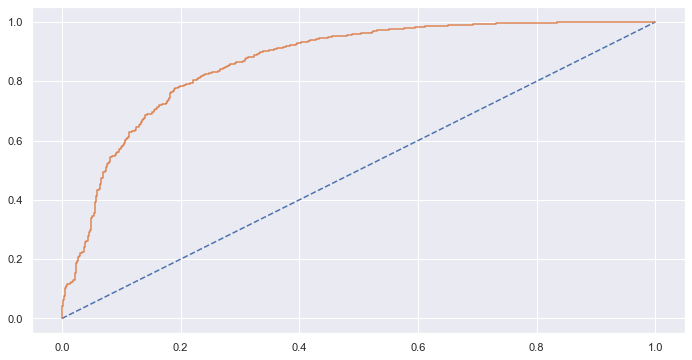

In [167]:
# predict probabilities
probs = LDA.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);

## Compare the performance of the model

## ROC of Train Dataset

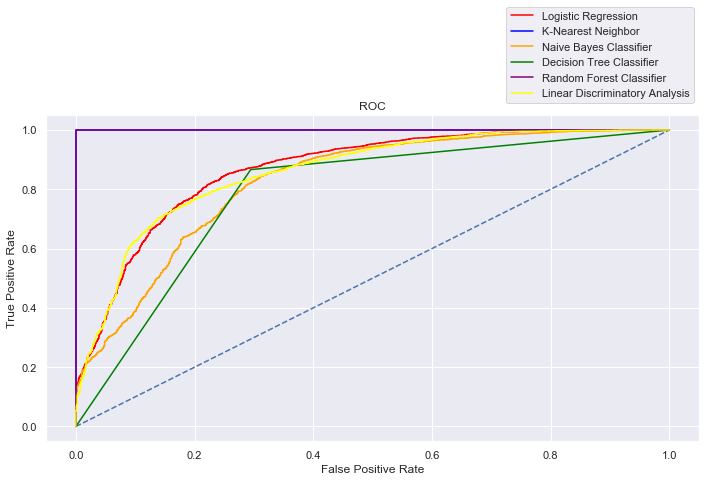

In [168]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr, log_train_tpr,color='red',label="Logistic Regression")
plt.plot(knn_train_fpr,knn_train_tpr,color='blue',label="K-Nearest Neighbor")
plt.plot(nb_train_fpr,nb_train_tpr,color='orange',label="Naive Bayes Classifier")
plt.plot(dt_train_fpr,dt_train_tpr,color='green',label="Decision Tree Classifier")
plt.plot(rf_train_fpr,rf_train_tpr,color='purple',label="Random Forest Classifier")
plt.plot(lda_train_fpr,lda_train_tpr,color='yellow',label="Linear Discriminatory Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC of Test Data set

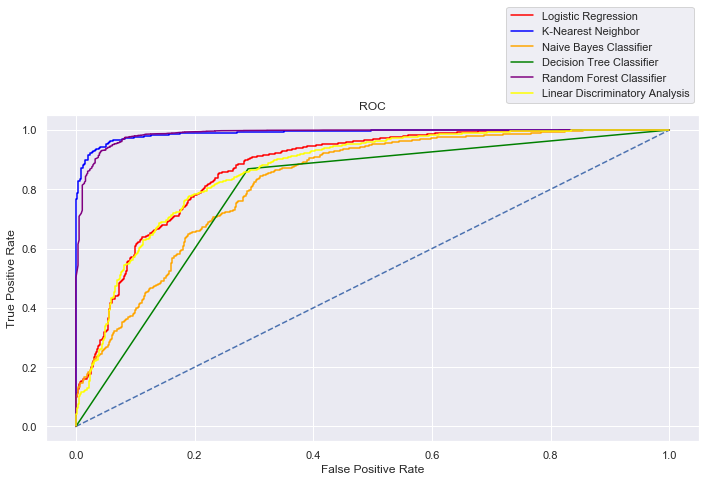

In [169]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_test_fpr, log_test_tpr,color='red',label="Logistic Regression")
plt.plot(knn_test_fpr,knn_test_tpr,color='blue',label="K-Nearest Neighbor")
plt.plot(nb_test_fpr,nb_test_tpr,color='orange',label="Naive Bayes Classifier")
plt.plot(dt_test_fpr,dt_test_tpr,color='green',label="Decision Tree Classifier")
plt.plot(rf_test_fpr,rf_test_tpr,color='purple',label="Random Forest Classifier")
plt.plot(lda_test_fpr,lda_test_tpr,color='yellow',label="Linear Discriminatory Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')


## Comparision of AUC Precision Recall and Accuracy of the Model

In [170]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dt = pd.DataFrame({'Logistic Regression Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
        'Logistic Regression Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
        'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'Naive Bayes Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'Naive Bayes Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'Decision Tree Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'Decision Tree Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
        'Random Forest Classifier Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Classifier Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Linear Discriminent Analysis Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'Linear Discriminent Analysis Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
       },index=index)
round(dt,2)

,Logistic Regression Train,Logistic Regression Test,KNN Train,KNN Test,Naive Bayes Train,Naive Bayes Test,Decision Tree Train,Decision Tree Test,Random Forest Classifier Train,Random Forest Classifier Test,Linear Discriminent Analysis Train,Linear Discriminent Analysis Test
Accuracy,0.88,0.88,1.00,1.00,0.86,0.86,0.84,0.84,1.00,1.00,0.87,0.87
AUC,0.87,0.87,1.00,0.99,0.83,0.82,0.79,0.79,1.00,0.99,0.86,0.87
Recall,0.97,0.97,1.00,0.99,0.92,0.93,0.87,0.87,1.00,0.99,0.97,0.98
Precision,0.90,0.91,1.00,0.95,0.91,0.92,0.93,0.94,1.00,0.97,0.89,0.90
F1 Score,0.93,0.94,1.00,0.97,0.91,0.92,0.90,0.90,1.00,0.98,0.93,0.94


## Now Moving Towards Bagging

## Logistic Regression with Bagging

In [171]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

LR_Bag = BaggingClassifier(base_estimator=LR,n_estimators=100,n_jobs=-1,random_state=0)

In [172]:
LR_Bag = LogisticRegression()
LR_Bag.fit(x_train,y_train)
y_pred_LR_Bag_Train=LR_Bag.predict(x_train)
y_pred_LR_Bag_Test = LR_Bag.predict(x_test)

In [173]:
confusion_matrix(y_train,y_pred_LR_Bag_Train)

array([[ 601,  740],
       [ 224, 6317]], dtype=int64)

In [174]:
print(classification_report(y_train,y_pred_LR_Bag_Train))


              precision    recall  f1-score   support

           0       0.73      0.45      0.55      1341
           1       0.90      0.97      0.93      6541

    accuracy                           0.88      7882
   macro avg       0.81      0.71      0.74      7882
weighted avg       0.87      0.88      0.87      7882



In [175]:
confusion_matrix(y_test,y_pred_LR_Bag_Test)

array([[ 271,  284],
       [  80, 2743]], dtype=int64)

In [176]:
print(classification_report(y_test,y_pred_LR_Bag_Test))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60       555
           1       0.91      0.97      0.94      2823

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



In [177]:
log_Bag_metrics=classification_report(y_train, y_pred_LR_Bag_Train,output_dict=True)
df=pd.DataFrame(log_Bag_metrics).transpose()
log_Bag_train_precision=round(df.loc["1"][0],2)
log_Bag_train_recall=round(df.loc["1"][1],2)
log_Bag_train_f1=round(df.loc["1"][2],2)
print ('log_Bag_train_precision ',log_Bag_train_precision)
print ('log_Bag_train_recall ',log_Bag_train_recall)
print ('log_Bag_train_f1 ',log_Bag_train_f1)

log_Bag_train_precision  0.9
log_Bag_train_recall  0.97
log_Bag_train_f1  0.93


In [178]:
log_Bag_metrics=classification_report(y_test, y_pred_LR_Bag_Test,output_dict=True)
df=pd.DataFrame(log_Bag_metrics).transpose()
log_Bag_test_precision=round(df.loc["1"][0],2)
log_Bag_test_recall=round(df.loc["1"][1],2)
log_Bag_test_f1=round(df.loc["1"][2],2)
print ('log_Bag_test_precision ',log_Bag_test_precision)
print ('log_Bag_test_recall ',log_Bag_test_recall)
print ('log_Bag_test_f1 ',log_Bag_test_f1)

log_Bag_test_precision  0.91
log_Bag_test_recall  0.97
log_Bag_test_f1  0.94


In [179]:
log_Bag_train_acc = LR_Bag.score(x_train, y_train)
log_Bag_train_acc

0.8776960162395331

In [180]:
log_Bag_test_acc = LR_Bag.score(x_train, y_train)
log_Bag_test_acc

0.8776960162395331

In [181]:
## AUC and ROC Curve for Logistic Regression with Bagging For Train Data

AUC: 0.868


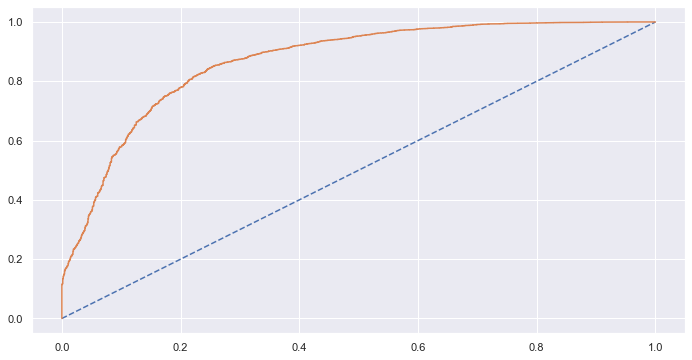

In [182]:
# predict probabilities
probs = LR_Bag.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_Bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_Bag_train_auc)
# calculate roc curve
log_Bag_train_fpr, log_Bag_train_tpr, log_Bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_Bag_train_fpr, log_Bag_train_tpr);

In [183]:
## AUC and ROC curve for Logistic Regression with Bagging for Test Data

AUC: 0.873


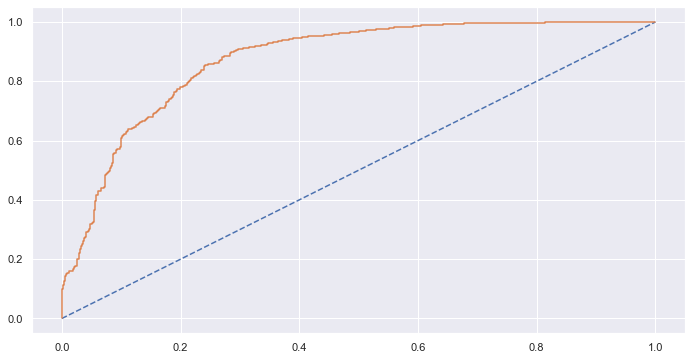

In [184]:
# predict probabilities
probs = LR_Bag.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_Bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_Bag_test_auc)
# calculate roc curve
log_Bag_test_fpr, log_Bag_test_tpr, log_Bag_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_Bag_test_fpr, log_Bag_test_tpr);

## KNN With Bagging

In [185]:
knn_Bag = BaggingClassifier(base_estimator=knn,n_estimators=100,n_jobs=-1,random_state=1)

In [186]:
knn_Bag = KNeighborsClassifier()
knn_Bag.fit(x_train,y_train)
y_pred_knn_Bag_Train = knn_Bag.predict(x_train)
y_pred_knn_Bag_Test = knn_Bag.predict(x_test)

In [187]:
confusion_matrix(y_train,y_pred_knn_Bag_Train)

array([[1107,  234],
       [  47, 6494]], dtype=int64)

In [188]:
print(classification_report(y_train,y_pred_knn_Bag_Train))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1341
           1       0.97      0.99      0.98      6541

    accuracy                           0.96      7882
   macro avg       0.96      0.91      0.93      7882
weighted avg       0.96      0.96      0.96      7882



In [189]:
confusion_matrix(y_test,y_pred_knn_Bag_Test)

array([[ 390,  165],
       [  58, 2765]], dtype=int64)

In [190]:
print(classification_report(y_test,y_pred_knn_Bag_Test))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78       555
           1       0.94      0.98      0.96      2823

    accuracy                           0.93      3378
   macro avg       0.91      0.84      0.87      3378
weighted avg       0.93      0.93      0.93      3378



In [191]:
knn_Bag_metrics=classification_report(y_train, y_pred_knn_Bag_Train,output_dict=True)
df=pd.DataFrame(knn_Bag_metrics).transpose()
knn_Bag_train_precision=round(df.loc["1"][0],2)
knn_Bag_train_recall=round(df.loc["1"][1],2)
knn_Bag_train_f1=round(df.loc["1"][2],2)
print ('KNN_Bag_train_precision ',knn_Bag_train_precision)
print ('KNN_Bag_train_recall ',knn_Bag_train_recall)
print ('KNN_Bag_train_f1 ',knn_Bag_train_f1)

KNN_Bag_train_precision  0.97
KNN_Bag_train_recall  0.99
KNN_Bag_train_f1  0.98


In [192]:
knn_Bag_metrics=classification_report(y_test, y_pred_knn_Bag_Test,output_dict=True)
df=pd.DataFrame(knn_Bag_metrics).transpose()
knn_Bag_test_precision=round(df.loc["1"][0],2)
knn_Bag_test_recall=round(df.loc["1"][1],2)
knn_Bag_test_f1=round(df.loc["1"][2],2)
print ('KNN_Bag_test_precision ',knn_Bag_test_precision)
print ('KNN_Bag_test_recall ',knn_Bag_test_recall)
print ('KNN_Bag_test_f1 ',knn_Bag_test_f1)

KNN_Bag_test_precision  0.94
KNN_Bag_test_recall  0.98
KNN_Bag_test_f1  0.96


In [193]:
knn_Bag_train_acc = knn_Bag.score(x_train, y_train)
knn_Bag_train_acc

0.9643491499619385

In [194]:
knn_Bag_test_acc = knn_Bag.score(x_train, y_train)
knn_Bag_test_acc

0.9643491499619385

In [195]:
## AUC and ROC Curve for KNN with Bagging For Train Data

AUC: 0.991


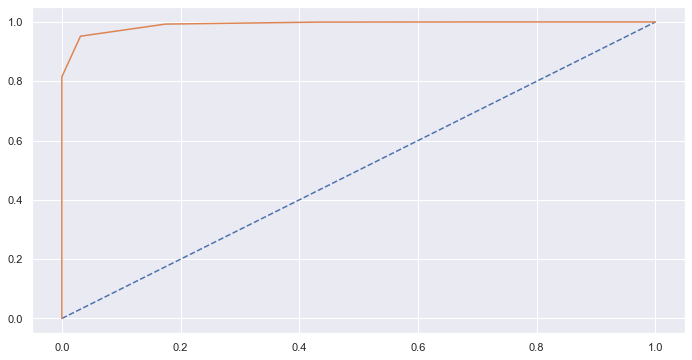

In [196]:
# predict probabilities
probs = knn_Bag.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_Bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_Bag_train_auc)
# calculate roc curve
knn_Bag_train_fpr, knn_Bag_train_tpr, knn_Bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_Bag_train_fpr, knn_Bag_train_tpr);

In [197]:
## AUC and ROC curve for KNN with Bagging for Test Data

AUC: 0.968


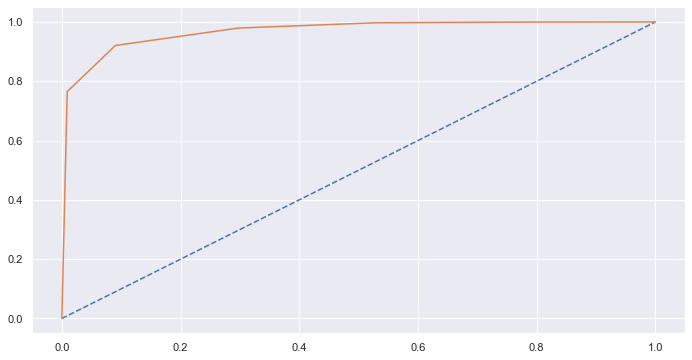

In [198]:
# predict probabilities
probs = knn_Bag.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_Bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_Bag_test_auc)
# calculate roc curve
knn_Bag_test_fpr, knn_Bag_test_tpr, knn_Bag_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_Bag_test_fpr, knn_Bag_test_tpr);

## Naive Bayes With Bagging

In [199]:
nb_Bag = BaggingClassifier(base_estimator=nb,n_estimators=100,n_jobs=-1,random_state=1)

In [200]:
nb_Bag = GaussianNB()
nb_Bag.fit(x_train,y_train)
y_pred_nb_Bag_Train = nb_Bag.predict(x_train)
y_pred_nb_Bag_Test = nb_Bag.predict(x_test)

In [201]:
confusion_matrix(y_train,y_pred_nb_Bag_Train)

array([[ 768,  573],
       [ 546, 5995]], dtype=int64)

In [202]:
print(classification_report(y_train,y_pred_nb_Bag_Train))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1341
           1       0.91      0.92      0.91      6541

    accuracy                           0.86      7882
   macro avg       0.75      0.74      0.75      7882
weighted avg       0.86      0.86      0.86      7882



In [203]:
confusion_matrix(y_test,y_pred_nb_Bag_Test)

array([[ 316,  239],
       [ 208, 2615]], dtype=int64)

In [204]:
print(classification_report(y_test,y_pred_nb_Bag_Test))

              precision    recall  f1-score   support

           0       0.60      0.57      0.59       555
           1       0.92      0.93      0.92      2823

    accuracy                           0.87      3378
   macro avg       0.76      0.75      0.75      3378
weighted avg       0.86      0.87      0.87      3378



In [205]:
nb_Bag_metrics=classification_report(y_train, y_pred_nb_Bag_Train,output_dict=True)
df=pd.DataFrame(nb_Bag_metrics).transpose()
nb_Bag_train_precision=round(df.loc["1"][0],2)
nb_Bag_train_recall=round(df.loc["1"][1],2)
nb_Bag_train_f1=round(df.loc["1"][2],2)
print ('Naive_Bayes_train_Bag_precision ',nb_Bag_train_precision)
print ('Naive_Bayes_train_Bag_recall ',nb_Bag_train_recall)
print ('Naive_Bayes_train_Bag_f1 ',nb_Bag_train_f1)

Naive_Bayes_train_Bag_precision  0.91
Naive_Bayes_train_Bag_recall  0.92
Naive_Bayes_train_Bag_f1  0.91


In [206]:
nb_Bag_metrics=classification_report(y_test, y_pred_nb_Bag_Test,output_dict=True)
df=pd.DataFrame(nb_Bag_metrics).transpose()
nb_Bag_test_precision=round(df.loc["1"][0],2)
nb_Bag_test_recall=round(df.loc["1"][1],2)
nb_Bag_test_f1=round(df.loc["1"][2],2)
print ('Naive_Bayes_test_Bag_precision ',nb_Bag_test_precision)
print ('Naive_Bayes_test_Bag_recall ',nb_Bag_test_recall)
print ('Naive_Bayes_test_Bag_f1 ',nb_Bag_test_f1)

Naive_Bayes_test_Bag_precision  0.92
Naive_Bayes_test_Bag_recall  0.93
Naive_Bayes_test_Bag_f1  0.92


In [207]:
nb_Bag_train_acc = nb_Bag.score(x_train, y_train)
nb_Bag_train_acc

0.8580309566099975

In [208]:
nb_Bag_test_acc = nb_Bag.score(x_train, y_train)
nb_Bag_test_acc

0.8580309566099975

In [209]:
## AUC and ROC Curve for Naive_Bayes with Bagging For Train Data

AUC: 0.826


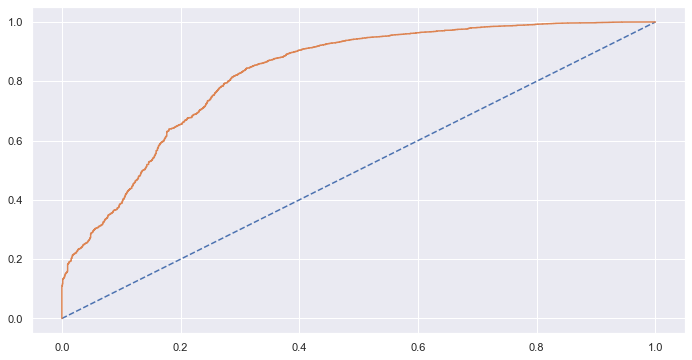

In [210]:
# predict probabilities
probs = nb_Bag.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_Bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_Bag_train_auc)
# calculate roc curve
nb_Bag_train_fpr, nb_Bag_train_tpr, nb_Bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_Bag_train_fpr, nb_Bag_train_tpr);

In [211]:
## AUC and ROC curve for Naive_Bayes with Bagging for Test Data

AUC: 0.823


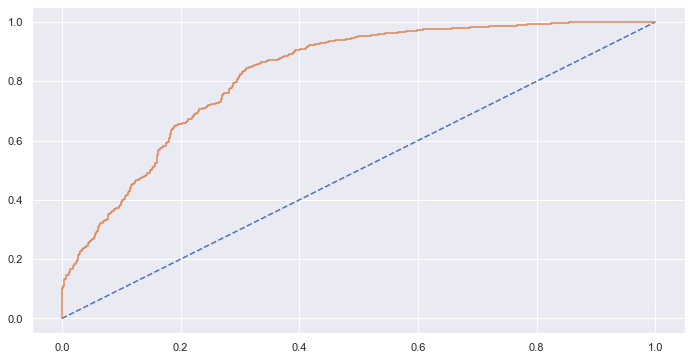

In [212]:
# predict probabilities
probs = nb_Bag.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_Bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_Bag_test_auc)
# calculate roc curve
nb_Bag_test_fpr, nb_Bag_test_tpr, nb_Bag_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_Bag_test_fpr, nb_Bag_test_tpr);

## Decision Tree with Bagging

In [213]:
dt_Bag = BaggingClassifier(base_estimator=dt,n_estimators=100,n_jobs=-1,random_state=1)

In [214]:
dt_Bag = DecisionTreeClassifier()
dt_Bag.fit(x_train,y_train)
y_pred_dt_Bag_Train = dt_Bag.predict(x_train)
y_pred_dt_Bag_Test = dt_Bag.predict(x_test)

In [215]:
confusion_matrix(y_train,y_pred_dt_Bag_Train)

array([[1341,    0],
       [   0, 6541]], dtype=int64)

In [216]:
print(classification_report(y_train,y_pred_dt_Bag_Train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      6541

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [217]:
confusion_matrix(y_test,y_pred_dt_Bag_Test)

array([[ 425,  130],
       [ 115, 2708]], dtype=int64)

In [218]:
print(classification_report(y_test,y_pred_dt_Bag_Test))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       555
           1       0.95      0.96      0.96      2823

    accuracy                           0.93      3378
   macro avg       0.87      0.86      0.87      3378
weighted avg       0.93      0.93      0.93      3378



In [219]:
dt_Bag_metrics=classification_report(y_train, y_pred_dt_Bag_Train,output_dict=True)
df=pd.DataFrame(dt_Bag_metrics).transpose()
dt_Bag_train_precision=round(df.loc["1"][0],2)
dt_Bag_train_recall=round(df.loc["1"][1],2)
dt_Bag_train_f1=round(df.loc["1"][2],2)
print ('Decision_Tree_train_Bag_precision ',dt_Bag_train_precision)
print ('Decision_Tree_train_Bag_recall ',dt_Bag_train_recall)
print ('Decision_Tree_train_Bag_f1 ',dt_Bag_train_f1)

Decision_Tree_train_Bag_precision  1.0
Decision_Tree_train_Bag_recall  1.0
Decision_Tree_train_Bag_f1  1.0


In [220]:
dt_Bag_metrics=classification_report(y_test, y_pred_dt_Bag_Test,output_dict=True)
df=pd.DataFrame(dt_Bag_metrics).transpose()
dt_Bag_test_precision=round(df.loc["1"][0],2)
dt_Bag_test_recall=round(df.loc["1"][1],2)
dt_Bag_test_f1=round(df.loc["1"][2],2)
print ('Decision_Tree_test_Bag_precision ',dt_Bag_test_precision)
print ('Decision_Tree_test_Bag_recall ',dt_Bag_test_recall)
print ('Decision_Tree_test_Bag_f1 ',dt_Bag_test_f1)

Decision_Tree_test_Bag_precision  0.95
Decision_Tree_test_Bag_recall  0.96
Decision_Tree_test_Bag_f1  0.96


In [221]:
dt_Bag_train_acc = dt_Bag.score(x_train, y_train)
dt_Bag_train_acc

1.0

In [222]:
dt_Bag_test_acc = dt_Bag.score(x_test, y_test)
dt_Bag_test_acc

0.9274718768502073

In [223]:
## AUC and ROC Curve for Decision_Tree For Train Data

AUC: 1.000


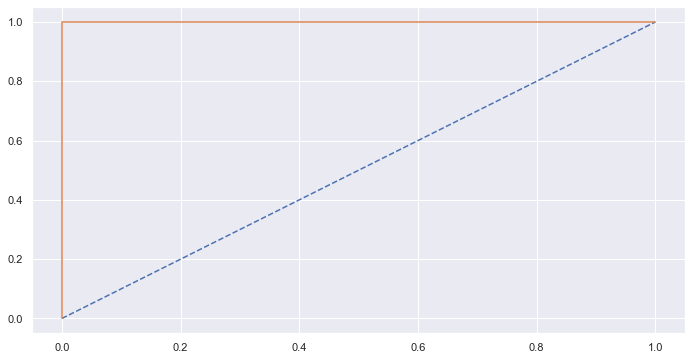

In [224]:
# predict probabilities
probs = dt_Bag.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_Bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_Bag_train_auc)
# calculate roc curve
dt_Bag_train_fpr, dt_Bag_train_tpr, dt_Bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_Bag_train_fpr, dt_Bag_train_tpr);

In [225]:
## AUC and ROC curve for Decision_Tree for Test Data

AUC: 0.863


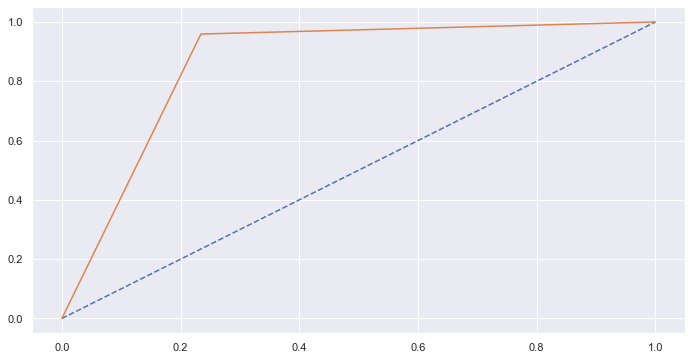

In [226]:
# predict probabilities
probs = dt_Bag.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_Bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_Bag_test_auc)
# calculate roc curve
dt_Bag_test_fpr, dt_Bag_test_tpr, dt_Bag_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_Bag_test_fpr, dt_Bag_test_tpr);

## LDA With Bagging

In [227]:
LDA_Bag = BaggingClassifier(base_estimator=LDA,n_estimators=100,n_jobs=-1,random_state=1)

In [228]:
LDA_Bag = LinearDiscriminantAnalysis()
LDA_Bag.fit(x_train,y_train)
y_pred_LDA_Bag_Train=LDA_Bag.predict(x_train)
y_pred_LDA_Bag_Test = LDA_Bag.predict(x_test)

In [229]:
confusion_matrix(y_train,y_pred_LDA_Bag_Train)

array([[ 522,  819],
       [ 189, 6352]], dtype=int64)

In [230]:
print(classification_report(y_train,y_pred_LDA_Bag_Train))


              precision    recall  f1-score   support

           0       0.73      0.39      0.51      1341
           1       0.89      0.97      0.93      6541

    accuracy                           0.87      7882
   macro avg       0.81      0.68      0.72      7882
weighted avg       0.86      0.87      0.86      7882



In [231]:
confusion_matrix(y_test,y_pred_LDA_Bag_Test)

array([[ 243,  312],
       [  67, 2756]], dtype=int64)

In [232]:
print(classification_report(y_test,y_pred_LDA_Bag_Test))

              precision    recall  f1-score   support

           0       0.78      0.44      0.56       555
           1       0.90      0.98      0.94      2823

    accuracy                           0.89      3378
   macro avg       0.84      0.71      0.75      3378
weighted avg       0.88      0.89      0.87      3378



In [233]:
lda_Bag_metrics=classification_report(y_train, y_pred_LDA_Bag_Train,output_dict=True)
df=pd.DataFrame(lda_Bag_metrics).transpose()
lda_Bag_train_precision=round(df.loc["1"][0],2)
lda_Bag_train_recall=round(df.loc["1"][1],2)
lda_Bag_train_f1=round(df.loc["1"][2],2)
print ('lda_train_precision_Bag ',lda_Bag_train_precision)
print ('lda_train_recall_Bag ',lda_Bag_train_recall)
print ('lda_train_f1_Bag ',lda_Bag_train_f1)

lda_train_precision_Bag  0.89
lda_train_recall_Bag  0.97
lda_train_f1_Bag  0.93


In [234]:
lda_Bag_metrics=classification_report(y_test, y_pred_LDA_Bag_Test,output_dict=True)
df=pd.DataFrame(lda_Bag_metrics).transpose()
lda_Bag_test_precision=round(df.loc["1"][0],2)
lda_Bag_test_recall=round(df.loc["1"][1],2)
lda_Bag_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision_Bag ',lda_Bag_test_precision)
print ('lda_test_recall_Bag ',lda_Bag_test_recall)
print ('lda_test_f1_Bag ',lda_Bag_test_f1)

lda_test_precision_Bag  0.9
lda_test_recall_Bag  0.98
lda_test_f1_Bag  0.94


In [235]:
lda_Bag_train_acc = LDA_Bag.score(x_train, y_train)
lda_Bag_train_acc

0.872113676731794

In [236]:
lda_Bag_test_acc = LDA_Bag.score(x_train, y_train)
lda_Bag_test_acc

0.872113676731794

In [237]:
## AUC and ROC Curve for Linear Discriminatory Analysis with Bagging For Train Data

AUC: 0.859


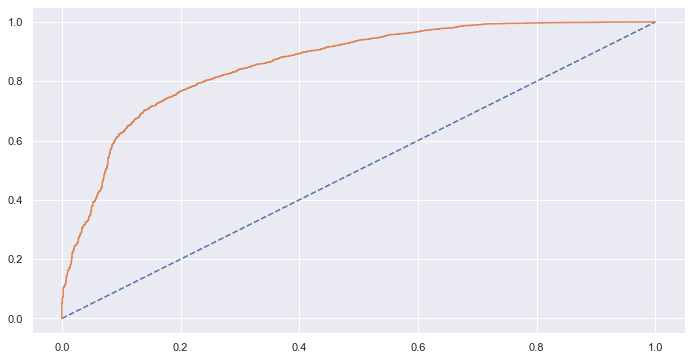

In [238]:
# predict probabilities
probs = LDA_Bag.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_Bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_Bag_train_auc)
# calculate roc curve
lda_Bag_train_fpr, lda_Bag_train_tpr, lda_Bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_Bag_train_fpr, lda_Bag_train_tpr);

In [239]:
## AUC and ROC curve for Linear Discriminatory Analysis for Test Data

AUC: 0.865


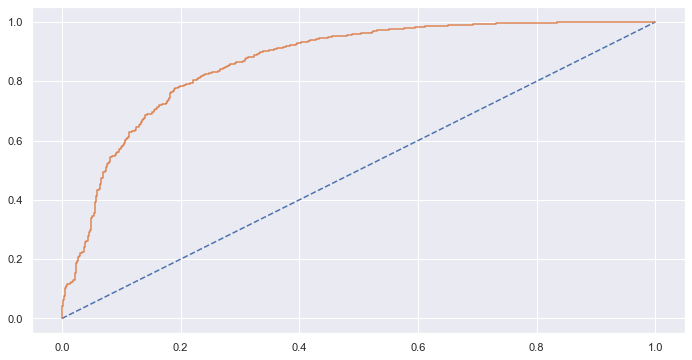

In [240]:
# predict probabilities
probs = LDA_Bag.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_Bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_Bag_test_auc)
# calculate roc curve
lda_Bag_test_fpr, lda_Bag_test_tpr, lda_Bag_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_Bag_test_fpr, lda_Bag_test_tpr);

## Compare the performance of the model

## ROC of Train Dataset

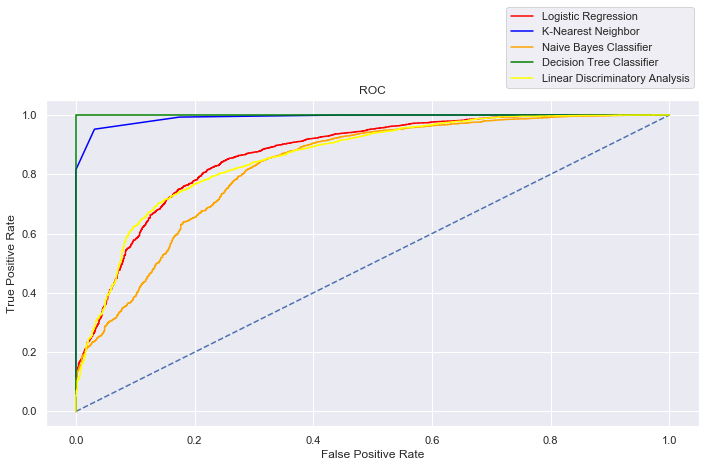

In [241]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_Bag_train_fpr, log_Bag_train_tpr,color='red',label="Logistic Regression")
plt.plot(knn_Bag_train_fpr,knn_Bag_train_tpr,color='blue',label="K-Nearest Neighbor")
plt.plot(nb_Bag_train_fpr,nb_Bag_train_tpr,color='orange',label="Naive Bayes Classifier")
plt.plot(dt_Bag_train_fpr,dt_Bag_train_tpr,color='green',label="Decision Tree Classifier")
plt.plot(lda_Bag_train_fpr,lda_Bag_train_tpr,color='yellow',label="Linear Discriminatory Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC of Test Data set

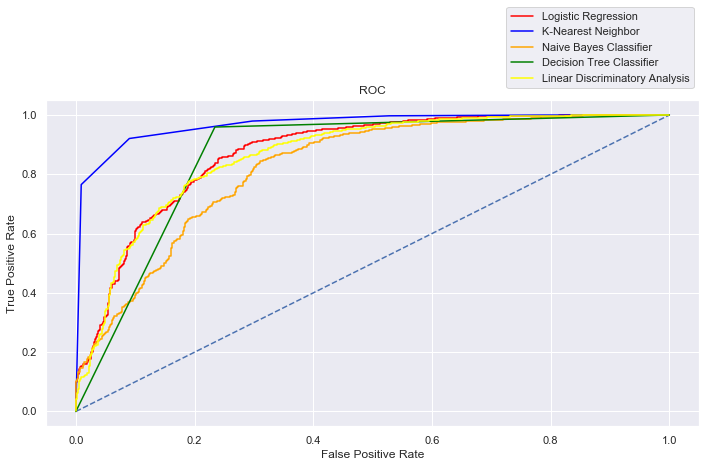

In [242]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_Bag_test_fpr, log_Bag_test_tpr,color='red',label="Logistic Regression")
plt.plot(knn_Bag_test_fpr,knn_Bag_test_tpr,color='blue',label="K-Nearest Neighbor")
plt.plot(nb_Bag_test_fpr,nb_Bag_test_tpr,color='orange',label="Naive Bayes Classifier")
plt.plot(dt_Bag_test_fpr,dt_Bag_test_tpr,color='green',label="Decision Tree Classifier")
plt.plot(lda_Bag_test_fpr,lda_Bag_test_tpr,color='yellow',label="Linear Discriminatory Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Comparision of AUC Precision Recall and Accuracy of the Model

In [243]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dt = pd.DataFrame({'Logistic Regression Bagging Train':[log_Bag_train_acc,log_Bag_train_auc,log_Bag_train_recall,log_Bag_train_precision,log_Bag_train_f1],
        'Logistic Regression Bagging Test':[log_Bag_test_acc,log_Bag_test_auc,log_Bag_test_recall,log_Bag_test_precision,log_Bag_test_f1],
        'KNN Bagging Train':[knn_Bag_train_acc,knn_Bag_train_auc,knn_Bag_train_recall,knn_Bag_train_precision,knn_Bag_train_f1],
        'KNN Bagging Test':[knn_Bag_test_acc,knn_Bag_test_auc,knn_Bag_test_recall,knn_Bag_test_precision,knn_Bag_test_f1],
        'Naive Bayes Bagging Train':[nb_Bag_train_acc,nb_Bag_train_auc,nb_Bag_train_recall,nb_Bag_train_precision,nb_Bag_train_f1],
        'Naive Bayes Bagging Test':[nb_Bag_test_acc,nb_Bag_test_auc,nb_Bag_test_recall,nb_Bag_test_precision,nb_Bag_test_f1],
        'Decision Tree Bagging Train':[dt_Bag_train_acc,dt_Bag_train_auc,dt_Bag_train_recall,dt_Bag_train_precision,dt_Bag_train_f1],
        'Decision Tree Bagging Test':[dt_Bag_test_acc,dt_Bag_test_auc,dt_Bag_test_recall,dt_Bag_test_precision,dt_Bag_test_f1],
        'Linear Discriminent Analysis Bagging Train':[lda_Bag_train_acc,lda_Bag_train_auc,lda_Bag_train_recall,lda_Bag_train_precision,lda_Bag_train_f1],
        'Linear Discriminent Analysis Bagging Test':[lda_Bag_test_acc,lda_Bag_test_auc,lda_Bag_test_recall,lda_Bag_test_precision,lda_Bag_test_f1],
       },index=index)
round(dt,2)

,Logistic Regression Bagging Train,Logistic Regression Bagging Test,KNN Bagging Train,KNN Bagging Test,Naive Bayes Bagging Train,Naive Bayes Bagging Test,Decision Tree Bagging Train,Decision Tree Bagging Test,Linear Discriminent Analysis Bagging Train,Linear Discriminent Analysis Bagging Test
Accuracy,0.88,0.88,0.96,0.96,0.86,0.86,1.00,0.93,0.87,0.87
AUC,0.87,0.87,0.99,0.97,0.83,0.82,1.00,0.86,0.86,0.87
Recall,0.97,0.97,0.99,0.98,0.92,0.93,1.00,0.96,0.97,0.98
Precision,0.90,0.91,0.97,0.94,0.91,0.92,1.00,0.95,0.89,0.90
F1 Score,0.93,0.94,0.98,0.96,0.91,0.92,1.00,0.96,0.93,0.94


## Boosting

In [244]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm
from lightgbm import LGBMModel,LGBMClassifier

## Logistic regression With Boosting

In [245]:
LR_Boost = AdaBoostClassifier(base_estimator=LR,n_estimators=100,learning_rate=0.01,random_state=1)

In [246]:
LR_Boost = LogisticRegression()
LR_Boost.fit(x_train,y_train)
y_pred_LR_Boost_Train=LR_Boost.predict(x_train)
y_pred_LR_Boost_Test = LR_Boost.predict(x_test)

In [247]:
confusion_matrix(y_train,y_pred_LR_Boost_Train)

array([[ 601,  740],
       [ 224, 6317]], dtype=int64)

In [248]:
print(classification_report(y_train,y_pred_LR_Boost_Train))


              precision    recall  f1-score   support

           0       0.73      0.45      0.55      1341
           1       0.90      0.97      0.93      6541

    accuracy                           0.88      7882
   macro avg       0.81      0.71      0.74      7882
weighted avg       0.87      0.88      0.87      7882



In [249]:
confusion_matrix(y_test,y_pred_LR_Boost_Test)

array([[ 271,  284],
       [  80, 2743]], dtype=int64)

In [250]:
print(classification_report(y_test,y_pred_LR_Boost_Test))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60       555
           1       0.91      0.97      0.94      2823

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



In [251]:
log_Boost_metrics=classification_report(y_train, y_pred_LR_Boost_Train,output_dict=True)
df=pd.DataFrame(log_Boost_metrics).transpose()
log_Boost_train_precision=round(df.loc["1"][0],2)
log_Boost_train_recall=round(df.loc["1"][1],2)
log_Boost_train_f1=round(df.loc["1"][2],2)
print ('log_Boost_train_precision ',log_Boost_train_precision)
print ('log_Boost_train_recall ',log_Boost_train_recall)
print ('log_Boost_train_f1 ',log_Boost_train_f1)

log_Boost_train_precision  0.9
log_Boost_train_recall  0.97
log_Boost_train_f1  0.93


In [252]:
log_Boost_metrics=classification_report(y_test, y_pred_LR_Boost_Test,output_dict=True)
df=pd.DataFrame(log_Boost_metrics).transpose()
log_Boost_test_precision=round(df.loc["1"][0],2)
log_Boost_test_recall=round(df.loc["1"][1],2)
log_Boost_test_f1=round(df.loc["1"][2],2)
print ('log_Boost_test_precision ',log_Boost_test_precision)
print ('log_Boost_test_recall ',log_Boost_test_recall)
print ('log_Boost_test_f1 ',log_Boost_test_f1)

log_Boost_test_precision  0.91
log_Boost_test_recall  0.97
log_Boost_test_f1  0.94


In [253]:
log_Boost_train_acc = LR_Boost.score(x_train, y_train)
log_Boost_train_acc

0.8776960162395331

In [254]:
log_Boost_test_acc = LR_Boost.score(x_train, y_train)
log_Boost_test_acc

0.8776960162395331

In [255]:
## AUC and ROC Curve for Logistic Regression with Boosting For Train Data

AUC: 0.868


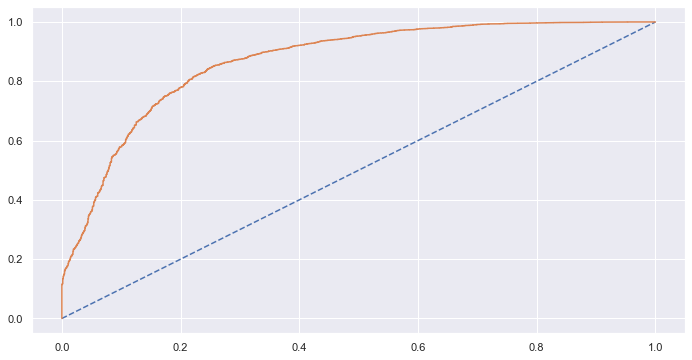

In [256]:
# predict probabilities
probs = LR_Boost.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_Boost_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_Boost_train_auc)
# calculate roc curve
log_Boost_train_fpr, log_Boost_train_tpr, log_Boost_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_Boost_train_fpr, log_Boost_train_tpr);

In [257]:
## AUC and ROC curve for Logistic Regression with Boosting for Test Data

AUC: 0.873


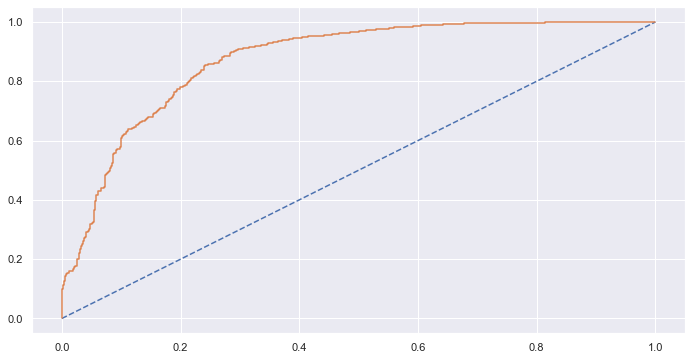

In [258]:
# predict probabilities
probs = LR_Boost.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_Boost_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_Boost_test_auc)
# calculate roc curve
log_Boost_test_fpr, log_Boost_test_tpr, log_Boost_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_Boost_test_fpr, log_Boost_test_tpr);

## KNN With Boosting

In [259]:
knn_Boost = AdaBoostClassifier(base_estimator=knn,n_estimators=100,learning_rate=0.01,random_state=1)

In [260]:
knn_Boost = KNeighborsClassifier()
knn_Boost.fit(x_train,y_train)
y_pred_knn_Boost_Train = knn_Boost.predict(x_train)
y_pred_knn_Boost_Test = knn_Boost.predict(x_test)

In [261]:
confusion_matrix(y_train,y_pred_knn_Boost_Train)

array([[1107,  234],
       [  47, 6494]], dtype=int64)

In [262]:
print(classification_report(y_train,y_pred_knn_Boost_Train))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1341
           1       0.97      0.99      0.98      6541

    accuracy                           0.96      7882
   macro avg       0.96      0.91      0.93      7882
weighted avg       0.96      0.96      0.96      7882



In [263]:
confusion_matrix(y_test,y_pred_knn_Boost_Test)

array([[ 390,  165],
       [  58, 2765]], dtype=int64)

In [264]:
print(classification_report(y_test,y_pred_knn_Boost_Test))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78       555
           1       0.94      0.98      0.96      2823

    accuracy                           0.93      3378
   macro avg       0.91      0.84      0.87      3378
weighted avg       0.93      0.93      0.93      3378



In [265]:
knn_Boost_metrics=classification_report(y_train, y_pred_knn_Boost_Train,output_dict=True)
df=pd.DataFrame(knn_Boost_metrics).transpose()
knn_Boost_train_precision=round(df.loc["1"][0],2)
knn_Boost_train_recall=round(df.loc["1"][1],2)
knn_Boost_train_f1=round(df.loc["1"][2],2)
print ('KNN_Boost_train_precision ',knn_Boost_train_precision)
print ('KNN_Boost_train_recall ',knn_Boost_train_recall)
print ('KNN_Boost_train_f1 ',knn_Boost_train_f1)

KNN_Boost_train_precision  0.97
KNN_Boost_train_recall  0.99
KNN_Boost_train_f1  0.98


In [266]:
knn_Boost_metrics=classification_report(y_test, y_pred_knn_Boost_Test,output_dict=True)
df=pd.DataFrame(knn_Boost_metrics).transpose()
knn_Boost_test_precision=round(df.loc["1"][0],2)
knn_Boost_test_recall=round(df.loc["1"][1],2)
knn_Boost_test_f1=round(df.loc["1"][2],2)
print ('KNN_Boost_test_precision ',knn_Boost_test_precision)
print ('KNN_Boost_test_recall ',knn_Boost_test_recall)
print ('KNN_Boost_test_f1 ',knn_Boost_test_f1)

KNN_Boost_test_precision  0.94
KNN_Boost_test_recall  0.98
KNN_Boost_test_f1  0.96


In [267]:
knn_Boost_train_acc = knn_Boost.score(x_train, y_train)
knn_Boost_train_acc

0.9643491499619385

In [268]:
knn_Boost_test_acc = knn_Boost.score(x_train, y_train)
knn_Boost_test_acc

0.9643491499619385

In [269]:
## AUC and ROC Curve for KNN with Boosting For Train Data

AUC: 0.991


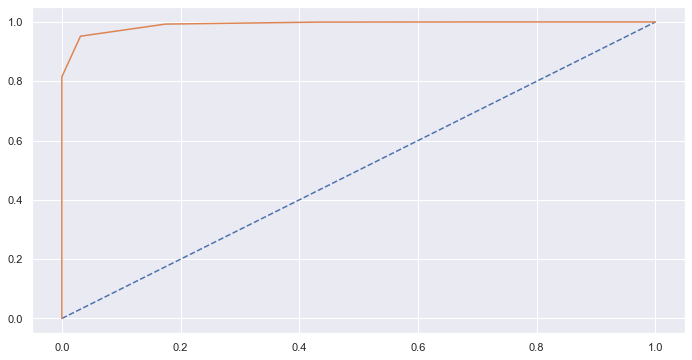

In [270]:
# predict probabilities
probs = knn_Boost.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_Boost_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_Boost_train_auc)
# calculate roc curve
knn_Boost_train_fpr, knn_Boost_train_tpr, knn_Boost_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_Boost_train_fpr, knn_Boost_train_tpr);

In [271]:
## AUC and ROC curve for KNN with Boosting for Test Data

AUC: 0.968


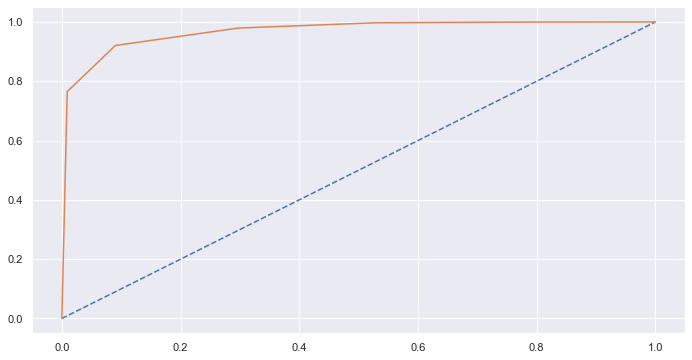

In [272]:
# predict probabilities
probs = knn_Boost.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_Boost_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_Boost_test_auc)
# calculate roc curve
knn_Boost_test_fpr, knn_Boost_test_tpr, knn_Boost_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_Boost_test_fpr, knn_Boost_test_tpr);

## Naive Bayes With Boosting

In [273]:
nb_Boost = AdaBoostClassifier(base_estimator=nb,n_estimators=100,learning_rate=0.01,random_state=1)

In [274]:
nb_Boost = GaussianNB()
nb_Boost.fit(x_train,y_train)
y_pred_nb_Boost_Train = nb_Boost.predict(x_train)
y_pred_nb_Boost_Test = nb_Boost.predict(x_test)

In [275]:
confusion_matrix(y_train,y_pred_nb_Boost_Train)

array([[ 768,  573],
       [ 546, 5995]], dtype=int64)

In [276]:
print(classification_report(y_train,y_pred_nb_Boost_Train))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1341
           1       0.91      0.92      0.91      6541

    accuracy                           0.86      7882
   macro avg       0.75      0.74      0.75      7882
weighted avg       0.86      0.86      0.86      7882



In [277]:
confusion_matrix(y_test,y_pred_nb_Boost_Test)

array([[ 316,  239],
       [ 208, 2615]], dtype=int64)

In [278]:
print(classification_report(y_test,y_pred_nb_Boost_Test))

              precision    recall  f1-score   support

           0       0.60      0.57      0.59       555
           1       0.92      0.93      0.92      2823

    accuracy                           0.87      3378
   macro avg       0.76      0.75      0.75      3378
weighted avg       0.86      0.87      0.87      3378



In [279]:
nb_Boost_metrics=classification_report(y_train, y_pred_nb_Boost_Train,output_dict=True)
df=pd.DataFrame(nb_Boost_metrics).transpose()
nb_Boost_train_precision=round(df.loc["1"][0],2)
nb_Boost_train_recall=round(df.loc["1"][1],2)
nb_Boost_train_f1=round(df.loc["1"][2],2)
print ('Naive_Bayes_train_Boost_precision ',nb_Boost_train_precision)
print ('Naive_Bayes_train_Boost_recall ',nb_Boost_train_recall)
print ('Naive_Bayes_train_Boost_f1 ',nb_Boost_train_f1)

Naive_Bayes_train_Boost_precision  0.91
Naive_Bayes_train_Boost_recall  0.92
Naive_Bayes_train_Boost_f1  0.91


In [280]:
nb_Boost_metrics=classification_report(y_test, y_pred_nb_Boost_Test,output_dict=True)
df=pd.DataFrame(nb_Boost_metrics).transpose()
nb_Boost_test_precision=round(df.loc["1"][0],2)
nb_Boost_test_recall=round(df.loc["1"][1],2)
nb_Boost_test_f1=round(df.loc["1"][2],2)
print ('Naive_Bayes_test_Boost_precision ',nb_Boost_test_precision)
print ('Naive_Bayes_test_Boost_recall ',nb_Boost_test_recall)
print ('Naive_Bayes_test_Boost_f1 ',nb_Boost_test_f1)

Naive_Bayes_test_Boost_precision  0.92
Naive_Bayes_test_Boost_recall  0.93
Naive_Bayes_test_Boost_f1  0.92


In [281]:
nb_Boost_train_acc = nb_Boost.score(x_train, y_train)
nb_Boost_train_acc

0.8580309566099975

In [282]:
nb_Boost_test_acc = nb_Boost.score(x_train, y_train)
nb_Boost_test_acc

0.8580309566099975

In [283]:
## AUC and ROC Curve for Naive_Bayes with Boosting For Train Data

AUC: 0.826


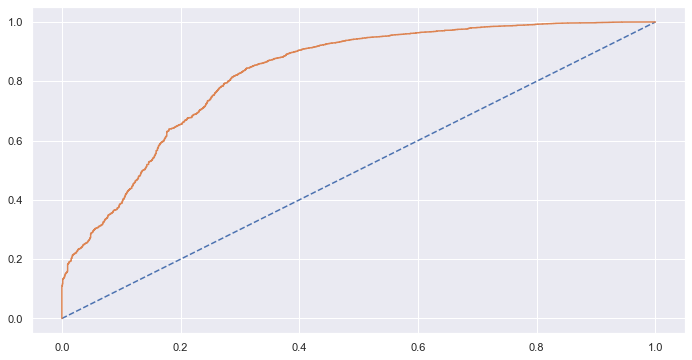

In [284]:
# predict probabilities
probs = nb_Boost.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_Boost_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_Boost_train_auc)
# calculate roc curve
nb_Boost_train_fpr, nb_Boost_train_tpr, nb_Boost_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_Boost_train_fpr, nb_Boost_train_tpr);

In [285]:
## AUC and ROC curve for Naive_Bayes with Boosting for Test Data

AUC: 0.823


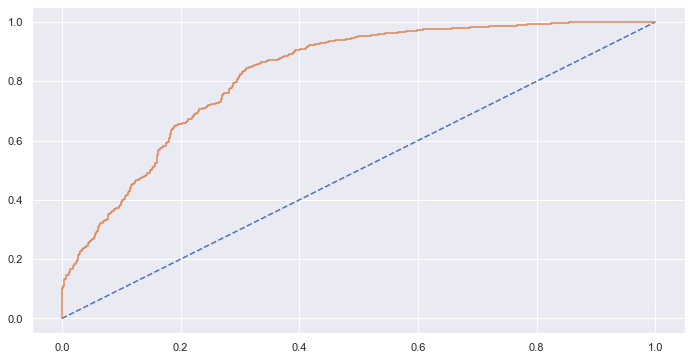

In [286]:
# predict probabilities
probs = nb_Boost.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_Boost_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_Boost_test_auc)
# calculate roc curve
nb_Boost_test_fpr, nb_Boost_test_tpr, nb_Boost_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_Boost_test_fpr, nb_Boost_test_tpr);

## Decision Tree with Boosting

In [287]:
dt_Boost = AdaBoostClassifier(base_estimator=dt,n_estimators=100,learning_rate=0.01,random_state=1)

In [288]:
dt_Boost = DecisionTreeClassifier()
dt_Boost.fit(x_train,y_train)
y_pred_dt_Boost_Train = dt_Boost.predict(x_train)
y_pred_dt_Boost_Test = dt_Boost.predict(x_test)

In [289]:
confusion_matrix(y_train,y_pred_dt_Boost_Train)

array([[1341,    0],
       [   0, 6541]], dtype=int64)

In [290]:
print(classification_report(y_train,y_pred_dt_Boost_Train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      6541

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [291]:
confusion_matrix(y_test,y_pred_dt_Boost_Test)

array([[ 426,  129],
       [ 123, 2700]], dtype=int64)

In [292]:
print(classification_report(y_test,y_pred_dt_Boost_Test))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       555
           1       0.95      0.96      0.96      2823

    accuracy                           0.93      3378
   macro avg       0.87      0.86      0.86      3378
weighted avg       0.93      0.93      0.93      3378



In [293]:
dt_Boost_metrics=classification_report(y_train, y_pred_dt_Boost_Train,output_dict=True)
df=pd.DataFrame(dt_Boost_metrics).transpose()
dt_Boost_train_precision=round(df.loc["1"][0],2)
dt_Boost_train_recall=round(df.loc["1"][1],2)
dt_Boost_train_f1=round(df.loc["1"][2],2)
print ('Decision_Tree_train_Boost_precision ',dt_Boost_train_precision)
print ('Decision_Tree_train_Boost_recall ',dt_Boost_train_recall)
print ('Decision_Tree_train_Boost_f1 ',dt_Boost_train_f1)

Decision_Tree_train_Boost_precision  1.0
Decision_Tree_train_Boost_recall  1.0
Decision_Tree_train_Boost_f1  1.0


In [294]:
dt_Boost_metrics=classification_report(y_test, y_pred_dt_Boost_Test,output_dict=True)
df=pd.DataFrame(dt_Boost_metrics).transpose()
dt_Boost_test_precision=round(df.loc["1"][0],2)
dt_Boost_test_recall=round(df.loc["1"][1],2)
dt_Boost_test_f1=round(df.loc["1"][2],2)
print ('Decision_Tree_test_Boost_precision ',dt_Boost_test_precision)
print ('Decision_Tree_test_Boost_recall ',dt_Boost_test_recall)
print ('Decision_Tree_test_Boost_f1 ',dt_Boost_test_f1)

Decision_Tree_test_Boost_precision  0.95
Decision_Tree_test_Boost_recall  0.96
Decision_Tree_test_Boost_f1  0.96


In [295]:
dt_Boost_train_acc = dt_Boost.score(x_train, y_train)
dt_Boost_train_acc

1.0

In [296]:
dt_Boost_test_acc = dt_Boost.score(x_test, y_test)
dt_Boost_test_acc

0.9253996447602132

In [297]:
## AUC and ROC Curve for Decision_Tree with Boosting For Train Data

AUC: 1.000


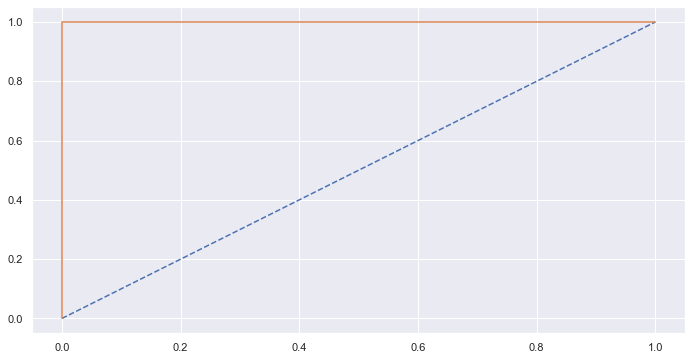

In [298]:
# predict probabilities
probs = dt_Boost.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_Boost_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_Boost_train_auc)
# calculate roc curve
dt_Boost_train_fpr, dt_Boost_train_tpr, dt_Boost_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_Boost_train_fpr, dt_Boost_train_tpr);

In [299]:
## AUC and ROC curve for Decision_Tree with boosting for Test Data

AUC: 0.862


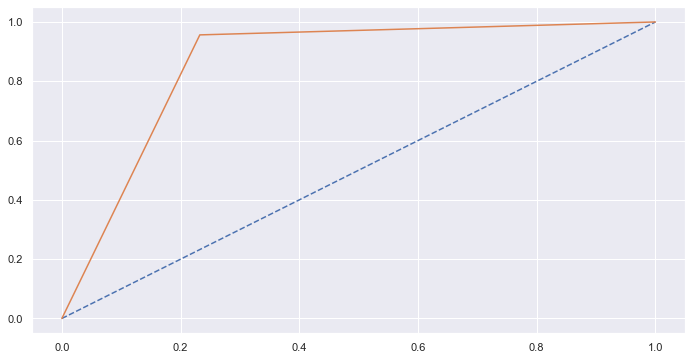

In [300]:
# predict probabilities
probs = dt_Boost.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_Boost_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_Boost_test_auc)
# calculate roc curve
dt_Boost_test_fpr, dt_Boost_test_tpr, dt_Boost_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_Boost_test_fpr, dt_Boost_test_tpr);

## Gradiant Boosting

In [301]:
gbcl = GradientBoostingClassifier(random_state=1,n_estimators=100,learning_rate=0.01)
gbcl = gbcl.fit(x_train, y_train)

In [302]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(x_train)
model_score = gbcl.score(x_train, y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[ 350  991]
 [  40 6501]]
              precision    recall  f1-score   support

           0       0.90      0.26      0.40      1341
           1       0.87      0.99      0.93      6541

    accuracy                           0.87      7882
   macro avg       0.88      0.63      0.67      7882
weighted avg       0.87      0.87      0.84      7882



In [303]:
gbcl_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_precision=round(df.loc["1"][0],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_f1=round(df.loc["1"][2],2)
print ('GBCL_train_precision ',gbcl_train_precision)
print ('GBCL_train_recall ',gbcl_train_recall)
print ('GBCL_train_f1 ',gbcl_train_f1)

GBCL_train_precision  0.87
GBCL_train_recall  0.99
GBCL_train_f1  0.93


In [304]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(x_test)
model_score = gbcl.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8738898756660746
[[ 144  411]
 [  15 2808]]
              precision    recall  f1-score   support

           0       0.91      0.26      0.40       555
           1       0.87      0.99      0.93      2823

    accuracy                           0.87      3378
   macro avg       0.89      0.63      0.67      3378
weighted avg       0.88      0.87      0.84      3378



In [305]:
## Precision Recall for for Test data

In [306]:
gbcl_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_precision=round(df.loc["1"][0],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_f1=round(df.loc["1"][2],2)
print ('GBCL_test_precision ',gbcl_test_precision)
print ('GBCL_test_recall ',gbcl_test_recall)
print ('GBCL_test_f1 ',gbcl_test_f1)

GBCL_test_precision  0.87
GBCL_test_recall  0.99
GBCL_test_f1  0.93


In [307]:
## Accuracy of Training and Test Data:

In [308]:
gbcl_test_acc = gbcl.score(x_test, y_test)
gbcl_test_acc

0.8738898756660746

In [309]:
gbcl_train_acc = gbcl.score(x_train, y_train)
gbcl_train_acc

0.8691956356254757

AUC: 0.874


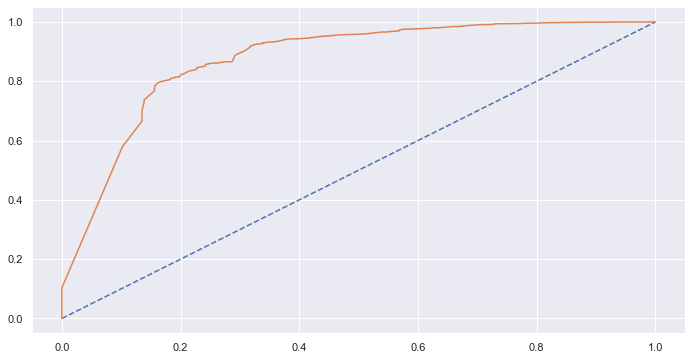

In [310]:
# predict probabilities
probs = gbcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

AUC: 0.877


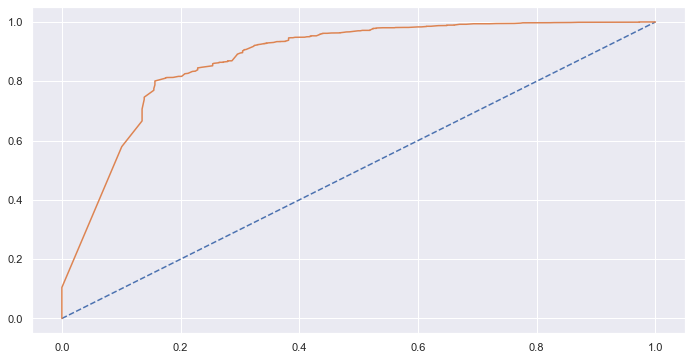

In [311]:
# predict probabilities
probs = gbcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr);

## Light GBM

In [312]:
lgbm = LGBMClassifier(objective='binary',n_estimators=100,reg_alpha=2,reg_lambda=5,random_state=1,learning_rate=0.01,is_unbalance=True)

In [313]:
lgbm.fit(x_train,y_train)
y_pred_lgbm_Train = lgbm.predict(x_train)
y_pred_lgbm_Test = lgbm.predict(x_test)

In [314]:
confusion_matrix(y_train,y_pred_lgbm_Train)

array([[1023,  318],
       [ 533, 6008]], dtype=int64)

In [315]:
print(classification_report(y_train,y_pred_lgbm_Train))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1341
           1       0.95      0.92      0.93      6541

    accuracy                           0.89      7882
   macro avg       0.80      0.84      0.82      7882
weighted avg       0.90      0.89      0.90      7882



In [316]:
confusion_matrix(y_test,y_pred_lgbm_Test)

array([[ 407,  148],
       [ 230, 2593]], dtype=int64)

In [317]:
print(classification_report(y_test,y_pred_lgbm_Test))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       555
           1       0.95      0.92      0.93      2823

    accuracy                           0.89      3378
   macro avg       0.79      0.83      0.81      3378
weighted avg       0.90      0.89      0.89      3378



In [318]:
lgbm_metrics=classification_report(y_train, y_pred_lgbm_Train,output_dict=True)
df=pd.DataFrame(lgbm_metrics).transpose()
lgbm_train_precision=round(df.loc["1"][0],2)
lgbm_train_recall=round(df.loc["1"][1],2)
lgbm_train_f1=round(df.loc["1"][2],2)
print ('lgbm_precision ',lgbm_train_precision)
print ('lgbm_recall ',lgbm_train_recall)
print ('lgbm_f1 ',lgbm_train_f1)

lgbm_precision  0.95
lgbm_recall  0.92
lgbm_f1  0.93


In [319]:
lgbm_metrics=classification_report(y_test, y_pred_lgbm_Test,output_dict=True)
df=pd.DataFrame(lgbm_metrics).transpose()
lgbm_test_precision=round(df.loc["1"][0],2)
lgbm_test_recall=round(df.loc["1"][1],2)
lgbm_test_f1=round(df.loc["1"][2],2)
print ('lgbm_precision ',lgbm_test_precision)
print ('lgbm_recall ',lgbm_test_recall)
print ('lgbm_f1 ',lgbm_test_f1)

lgbm_precision  0.95
lgbm_recall  0.92
lgbm_f1  0.93


In [320]:
lgbm_train_acc = lgbm.score(x_train, y_train)
lgbm_train_acc

0.8920324790662268

In [321]:
lgbm_test_acc = lgbm.score(x_test, y_test)
lgbm_test_acc

0.8880994671403197

In [322]:
## AUC and ROC Curve for Light BGM For Train Data

AUC: 0.942


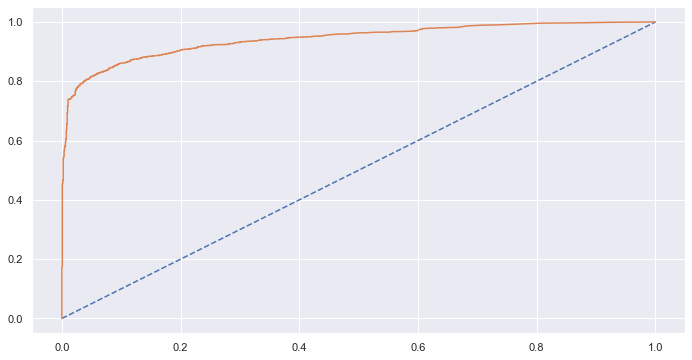

In [323]:
# predict probabilities
probs = lgbm.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lgbm_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lgbm_train_auc)
# calculate roc curve
lgbm_train_fpr, lgbm_train_tpr, lgbm_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lgbm_train_fpr, lgbm_train_tpr);

In [324]:
## AUC and ROC curve for Light BGM for Test Data

AUC: 0.927


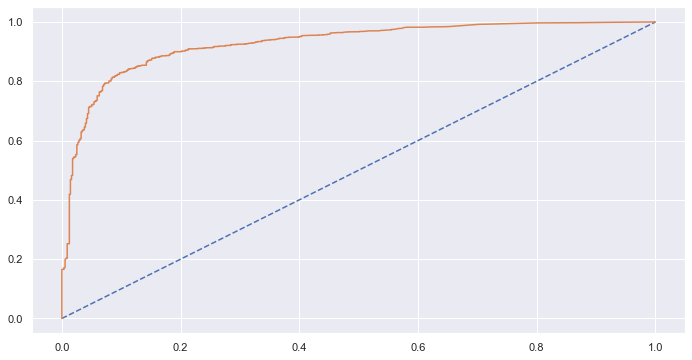

In [325]:
# predict probabilities
probs = lgbm.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lgbm_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lgbm_test_auc)
# calculate roc curve
lgbm_test_fpr, lgbm_test_tpr, lgbm_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lgbm_test_fpr, lgbm_test_tpr);

## Compare the performance of the model

## ROC of Train Dataset

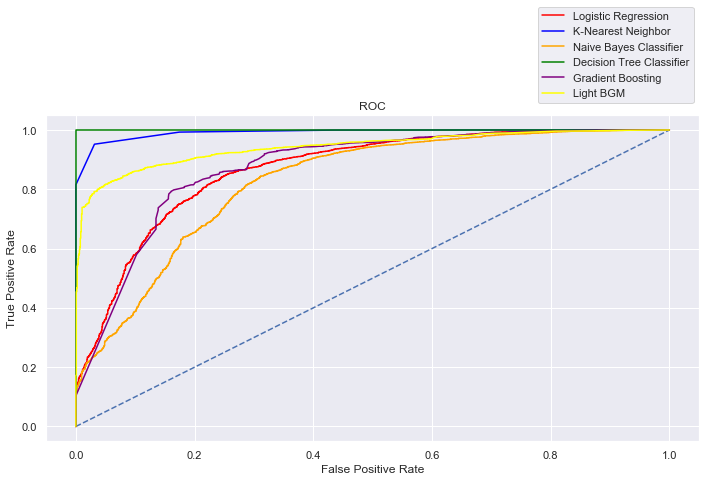

In [326]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_Boost_train_fpr, log_Boost_train_tpr,color='red',label="Logistic Regression")
plt.plot(knn_Boost_train_fpr,knn_Boost_train_tpr,color='blue',label="K-Nearest Neighbor")
plt.plot(nb_Boost_train_fpr,nb_Boost_train_tpr,color='orange',label="Naive Bayes Classifier")
plt.plot(dt_Boost_train_fpr,dt_Boost_train_tpr,color='green',label="Decision Tree Classifier")
plt.plot(gbcl_train_fpr,gbcl_train_tpr,color='purple',label="Gradient Boosting")
plt.plot(lgbm_train_fpr,lgbm_train_tpr,color='yellow',label="Light BGM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')


## ROC of Test Data set

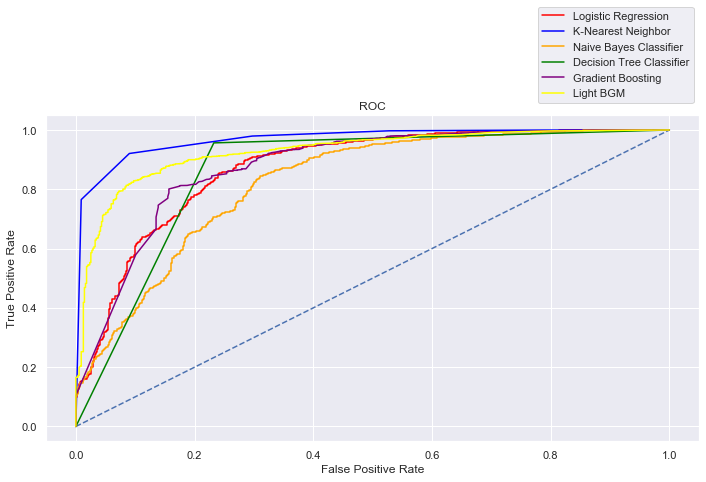

In [327]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_Boost_test_fpr, log_Boost_test_tpr,color='red',label="Logistic Regression")
plt.plot(knn_Boost_test_fpr,knn_Boost_test_tpr,color='blue',label="K-Nearest Neighbor")
plt.plot(nb_Boost_test_fpr,nb_Boost_test_tpr,color='orange',label="Naive Bayes Classifier")
plt.plot(dt_Boost_test_fpr,dt_Boost_test_tpr,color='green',label="Decision Tree Classifier")
plt.plot(gbcl_test_fpr,gbcl_test_tpr,color='purple',label="Gradient Boosting")
plt.plot(lgbm_test_fpr,lgbm_test_tpr,color='yellow',label="Light BGM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')


## Comparision of AUC Precision Recall and Accuracy of the Model

In [328]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dt = pd.DataFrame({'Logistic Regression Boosting Train':[log_Boost_train_acc,log_Boost_train_auc,log_Boost_train_recall,log_Boost_train_precision,log_Boost_train_f1],
        'Logistic Regression Boosting Test':[log_Boost_test_acc,log_Boost_test_auc,log_Boost_test_recall,log_Boost_test_precision,log_Boost_test_f1],
        'KNN Boosting Train':[knn_Boost_train_acc,knn_Boost_train_auc,knn_Boost_train_recall,knn_Boost_train_precision,knn_Boost_train_f1],
        'KNN Boosting Test':[knn_Boost_test_acc,knn_Boost_test_auc,knn_Boost_test_recall,knn_Boost_test_precision,knn_Boost_test_f1],
        'Naive Bayes Boosting Train':[nb_Boost_train_acc,nb_Boost_train_auc,nb_Boost_train_recall,nb_Boost_train_precision,nb_Boost_train_f1],
        'Naive Bayes Boosting Test':[nb_Boost_test_acc,nb_Boost_test_auc,nb_Boost_test_recall,nb_Boost_test_precision,nb_Boost_test_f1],
        'Decision Tree Boosting Train':[dt_Boost_train_acc,dt_Boost_train_auc,dt_Boost_train_recall,dt_Boost_train_precision,dt_Boost_train_f1],
        'Decision Tree Boosting Test':[dt_Boost_test_acc,dt_Boost_test_auc,dt_Boost_test_recall,dt_Boost_test_precision,dt_Boost_test_f1],
        'Gradient Boosting Train':[gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
        'Gradient Boosting Test':[gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],
        'Light GBM Train':[lgbm_train_acc,lgbm_train_auc,lgbm_train_recall,lgbm_train_precision,lgbm_train_f1],
        'light GBM Test':[lgbm_test_acc,lgbm_test_auc,lgbm_test_recall,lgbm_test_precision,lgbm_test_f1],
        },index=index)
round(dt,2)

,Logistic Regression Boosting Train,Logistic Regression Boosting Test,KNN Boosting Train,KNN Boosting Test,Naive Bayes Boosting Train,Naive Bayes Boosting Test,Decision Tree Boosting Train,Decision Tree Boosting Test,Gradient Boosting Train,Gradient Boosting Test,Light GBM Train,light GBM Test
Accuracy,0.88,0.88,0.96,0.96,0.86,0.86,1.00,0.93,0.87,0.87,0.89,0.89
AUC,0.87,0.87,0.99,0.97,0.83,0.82,1.00,0.86,0.87,0.88,0.94,0.93
Recall,0.97,0.97,0.99,0.98,0.92,0.93,1.00,0.96,0.99,0.99,0.92,0.92
Precision,0.90,0.91,0.97,0.94,0.91,0.92,1.00,0.95,0.87,0.87,0.95,0.95
F1 Score,0.93,0.94,0.98,0.96,0.91,0.92,1.00,0.96,0.93,0.93,0.93,0.93


## Optimum Model

In [329]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dt = pd.DataFrame({'Logistic Regression Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],        
        'Naive Bayes Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],        
        'Decision Tree Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],        
        'Random Forest Classifier Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],       
        'Linear Discriminent Analysis Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],       
        'Logistic Regression Bagging Test':[log_Bag_test_acc,log_Bag_test_auc,log_Bag_test_recall,log_Bag_test_precision,log_Bag_test_f1],       
        'KNN Bagging Test':[knn_Bag_test_acc,knn_Bag_test_auc,knn_Bag_test_recall,knn_Bag_test_precision,knn_Bag_test_f1],       
        'Naive Bayes Bagging Test':[nb_Bag_test_acc,nb_Bag_test_auc,nb_Bag_test_recall,nb_Bag_test_precision,nb_Bag_test_f1],       
        'Decision Tree Bagging Test':[dt_Bag_test_acc,dt_Bag_test_auc,dt_Bag_test_recall,dt_Bag_test_precision,dt_Bag_test_f1],       
        'Linear Discriminent Analysis Bagging Test':[lda_Bag_test_acc,lda_Bag_test_auc,lda_Bag_test_recall,lda_Bag_test_precision,lda_Bag_test_f1],       
        'Logistic Regression Boosting Test':[log_Boost_test_acc,log_Boost_test_auc,log_Boost_test_recall,log_Boost_test_precision,log_Boost_test_f1],       
        'KNN Boosting Test':[knn_Boost_test_acc,knn_Boost_test_auc,knn_Boost_test_recall,knn_Boost_test_precision,knn_Boost_test_f1],       
        'Naive Bayes Boosting Test':[nb_Boost_test_acc,nb_Boost_test_auc,nb_Boost_test_recall,nb_Boost_test_precision,nb_Boost_test_f1],    
        'Decision Tree Boosting Test':[dt_Boost_test_acc,dt_Boost_test_auc,dt_Boost_test_recall,dt_Boost_test_precision,dt_Boost_test_f1],        
        'Gradient Boosting Test':[gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],        
        'light GBM Test':[lgbm_test_acc,lgbm_test_auc,lgbm_test_recall,lgbm_test_precision,lgbm_test_f1],
       },index=index)
round(dt,2).T

,Accuracy,AUC,Recall,Precision,F1 Score
Logistic Regression Test,0.88,0.87,0.97,0.91,0.94
KNN Test,1.00,0.99,0.99,0.95,0.97
Naive Bayes Test,0.86,0.82,0.93,0.92,0.92
Decision Tree Test,0.84,0.79,0.87,0.94,0.90
Random Forest Classifier Test,1.00,0.99,0.99,0.97,0.98
Linear Discriminent Analysis Test,0.87,0.87,0.98,0.90,0.94
Logistic Regression Bagging Test,0.88,0.87,0.97,0.91,0.94
KNN Bagging Test,0.96,0.97,0.98,0.94,0.96
Naive Bayes Bagging Test,0.86,0.82,0.93,0.92,0.92
Decision Tree Bagging Test,0.93,0.86,0.96,0.95,0.96
